<a href="https://colab.research.google.com/github/Ayushp0509/Bike-Sharing-Demand-Prediction-Project/blob/main/Bike_Sharing_Demand_Prediction_Mid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Title : Seoul Bike Sharing Demand Prediction

### Project Type - Regression

###Name : Ayush Patel


##Project Summery

Predicting bike demand poses a significant challenge for bike rental companies, requiring accurate forecasts of hourly rented bike counts to streamline inventory management. This project aimed to construct a regression-based supervised machine learning model focused on predicting bike demand within specific time frames.

The project followed a systematic approach involving the following steps:

Data Preprocessing: The dataset underwent thorough preprocessing to address missing values, outliers, and data inconsistencies.

Data Split: After preprocessing, the data was randomly divided into training and test sets, with a random state of 0. The training data was used to train predictive models, while the test data was utilized for evaluation.

Model Training: Various regression models, including Linear Regression, Lasso Regression, Ridge Regression, Random Forest, and Gradient Boosting, were trained using the prepared training dataset. The models were optimized via hyperparameter tuning to enhance performance.

Model Evaluation: The trained models underwent evaluation using metrics like mean absolute error, root mean squared error, and R-squared on the test data. The model demonstrating superior performance on the test set was chosen.

Feature Importance Analysis: An analysis was conducted to assess the impact of individual features on the model's predictive capability. This examination revealed the significance of factors such as temperature, weather conditions, and seasonal patterns in predicting bike demand.

Model Deployment: The selected model was deployed in a live production environment, enabling real-time predictions of bike demand. Continuous monitoring of the model's performance ensured ongoing accuracy and applicability.

Each regression model underwent fine-tuning via grid search coupled with repeated cross-validation to identify optimal hyperparameters. Furthermore, determining feature importance helped identify highly influential features affecting bike demand prediction

## Problem Description

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##GitHub link

Repository link:https://github.com/Ayushp0509/Bike-Sharing-Demand-Prediction-Project

## Business Objective

Forecasting the right number of bikes needed at specific times and days is a significant challenge for bike rental companies. It's crucial to strike a balance: a shortage of bikes can lead to increased maintenance issues , while an excess can result in financial losses by reducing immediate revenue and impacting customer trust.

Predicting bike demand helps companies manage bike availability better, making sure there are enough bikes for customers. Therefore, having a strong method to estimate demand is vital. It helps companies operate efficiently, use resources well, and provide customers with a smooth experience. Accurate predictions are crucial for making informed decisions and ensuring the success of bike-sharing businesses

##Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


In [ ]:
#loading dataset
bike_df = pd.read_csv("/content/drive/MyDrive/Almabetter/SeoulBikeData.csv" , encoding = "unicode_escape")

## Reading the data

In [ ]:
bike_df.head(n = 10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [ ]:
bike_df.tail(n = 10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

Data in dataset consist of info about the bike rented on hourly bases from 01/12/2017 to 30/11/2018.
Weather conditions are also taken into consideration.

In [ ]:
#dimensions of dataset
bike_df.shape

(8760, 14)

There are total 8760 data points , 13 features and one target output i.e. Rented Bike Count

In [ ]:
#summary
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Numerical as well as categorical variables are present. There are no null values in any column.
Ony one change we have yto do that is Date has datatype named object so we need to change it to date datatype.


## Breaking a date column and Changing data type

In [ ]:
#creating function to change data type of date
def get_date(Date):
  date_obj = dt.datetime.strptime(Date , "%d/%m/%Y")
  date_obj = pd.to_datetime(date_obj, format = "%Y-%m-%d")
  return date_obj

 #applying function
 bike_df["Date"] = bike_df["Date"].apply(get_date)



In [ ]:
#Extracting date, month and day of week
bike_df['Day'] = bike_df['Date'].apply(lambda x : x.day)
bike_df['Month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['Day_of_week'] = bike_df['Date'].dt.day_name()

bike_df= bike_df.drop("Date", axis= 1)

In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   Month Day_of_week  
0     12      Friday  
1     12      Friday  
2     12      Friday  
3     12      Friday  
4     12      Friday

## Checking duplicate value

In [ ]:
# checking for duplicate values
bike_df.duplicated().sum()

0

## Checking for missing values

In [ ]:
# checking for missing values
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Day_of_week                  0
dtype: int64

There are no duplicate and no missing values.

##Exploratory Data Analysis

### Univariate Analysis

Analysing target variable Rented Bike Count (DEPENDENT Variable)  

In [ ]:
#numerical column summary
bike_df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Let's see Distribution of Rented Bike Count

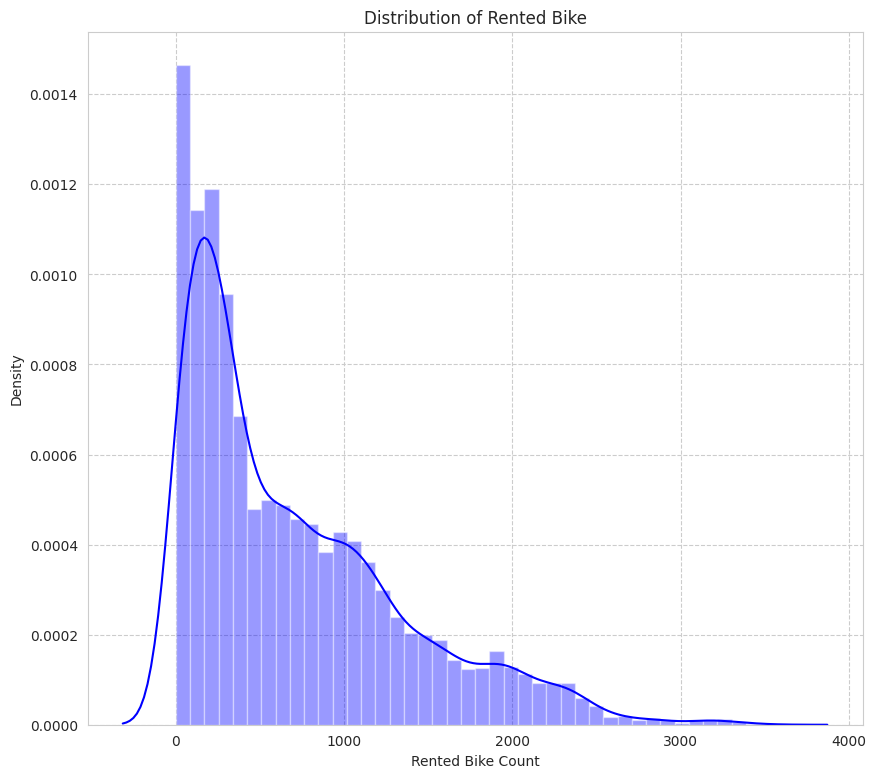

In [ ]:
#distribution plot
plt.figure(figsize=(10,9))
sns.distplot(bike_df["Rented Bike Count"] , kde=True,color='b')
plt.title("Distribution of Rented Bike");


In [ ]:
#skewness score
bike_df["Rented Bike Count"].skew()

1.1534281773679014

When the distribution of the 'Rented Bike Count' is positively skewed and its skewness score exceeds +1, it suggests that the data is heavily skewed towards lower values. To reduce this skewness, transformation techniques such as logarithmic transformation or square root transformation can be applied. These transformations help in making the distribution more symmetrical and closer to a normal distribution, aiding in better modeling and analysis of the data.

Methods to remove skewness are :

*square-root for moderate skew:* sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

*log for greater skew:*log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

*inverse for severe skew:* 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

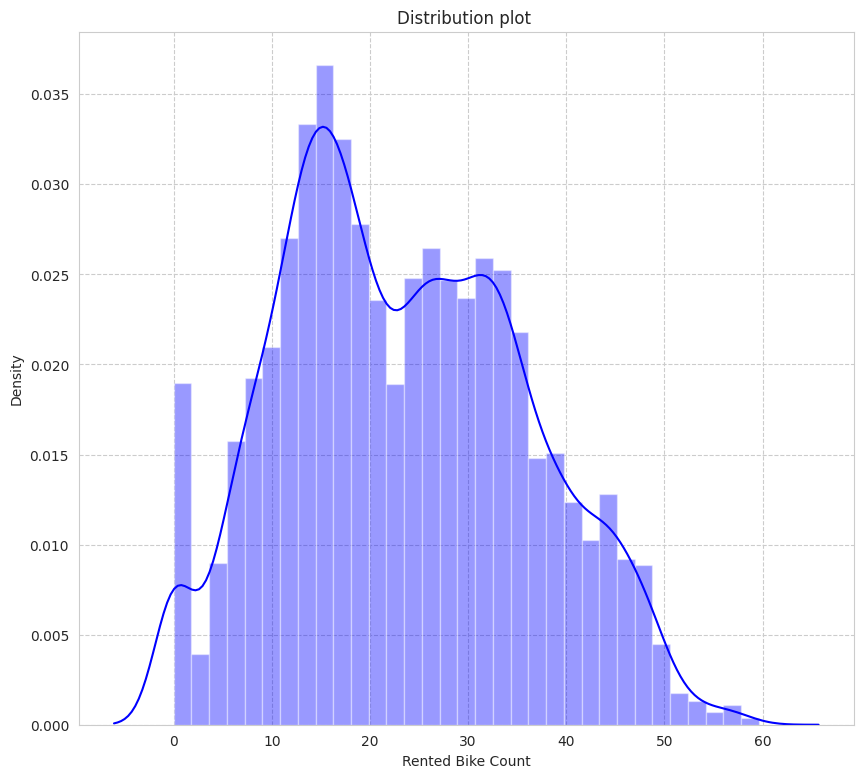

In [ ]:
#Applying square-root transformation
plt.figure(figsize=(10,9))
sns.distplot(np.sqrt(bike_df["Rented Bike Count"] ), kde=True,color='b')
plt.title("Distribution plot ");

In [ ]:
#checking skewness score
np.sqrt(bike_df["Rented Bike Count"]).skew()

0.237362090985412

looking Like almost normal distribution.

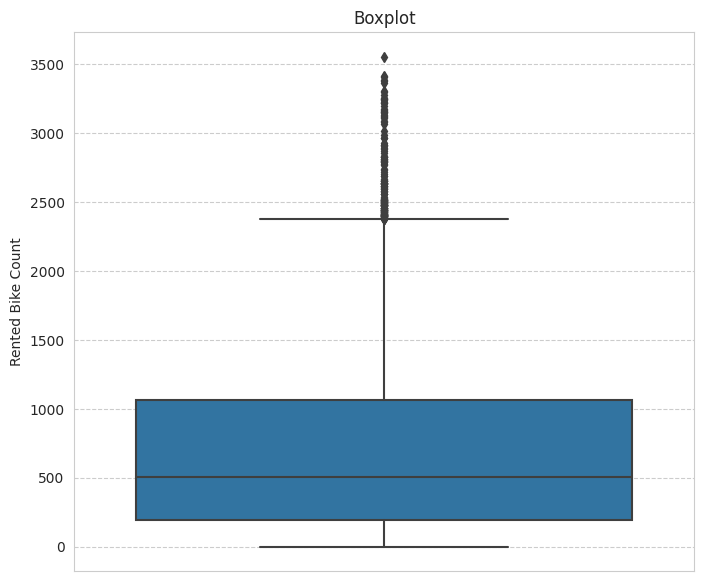

In [ ]:
#Finding outliers
plt.figure(figsize=(8,7))
sns.boxplot( y = bike_df["Rented Bike Count"])
plt.title("Boxplot");

##Removing Outliers:
Median for 'Rented Bike Count' is 500 and we can see some outliers over there. So to remove them we have to use 'showfliers' parameter and set it to 'False'.


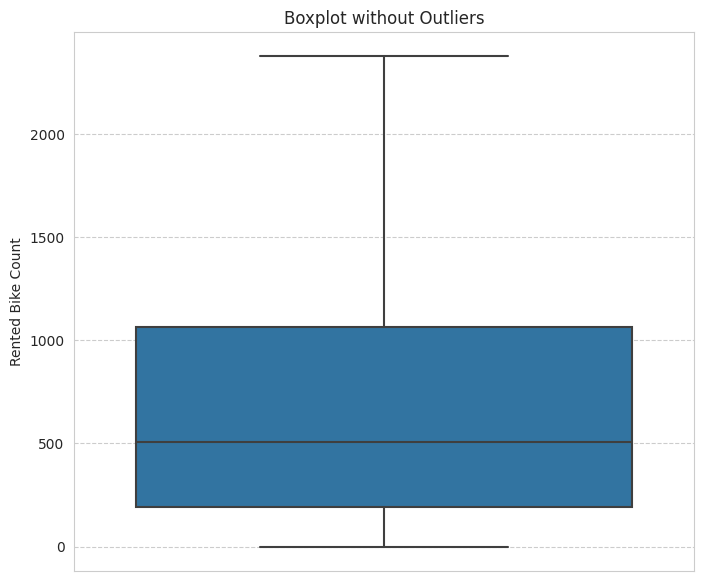

In [ ]:
#boxplot
plt.figure(figsize=(8,7))
sns.boxplot( y = bike_df["Rented Bike Count"] , showfliers = False)
plt.title("Boxplot without Outliers");

## Independent Variables

### Numerical Variables


In [ ]:
#Making list of numerical variables
numerical_variables = list(bike_df.describe().columns[1:])
numerical_variables

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [ ]:
#summary of numerical features
bike_df[numerical_variables].describe()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  8760.000000      8760.000000  8760.000000       8760.000000   
mean     11.500000        12.882922    58.226256          1.724909   
std       6.922582        11.944825    20.362413          1.036300   
min       0.000000       -17.800000     0.000000          0.000000   
25%       5.750000         3.500000    42.000000          0.900000   
50%      11.500000        13.700000    57.000000          1.500000   
75%      17.250000        22.500000    74.000000          2.300000   
max      23.000000        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean        1436.825799                   4.073813                 0.569111   
std          608.298712                  13.060369                 0.868746   
min           27.000000                 -30.600000                 0.000000   
25%          940.000000                  -4.700000                 0.000000   
50%         1698.000000                   5.100000                 0.010000   
75%         2000.000000                  14.800000                 0.930000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)          Day        Month  
count   8760.000000    8760.000000  8760.000000  8760.000000  
mean       0.148687       0.075068    15.720548     6.526027  
std        1.128193       0.436746     8.796749     3.448048  
min        0.000000       0.000000     1.000000     1.000000  
25%        0.000000       0.000000     8.000000     4.000000  
50%        0.000000       0.000000    16.000000     7.000000  
75%        0.000000       0.000000    23.000000    10.000000  
max       35.000000       8.800000    31.000000    12.000000

Histograms are a great way to visualize the distribution of numerical columns

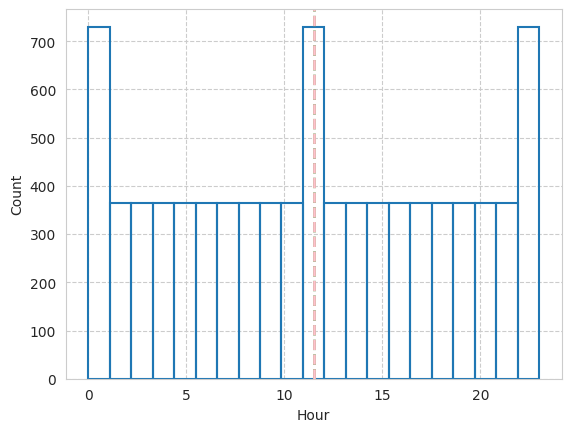

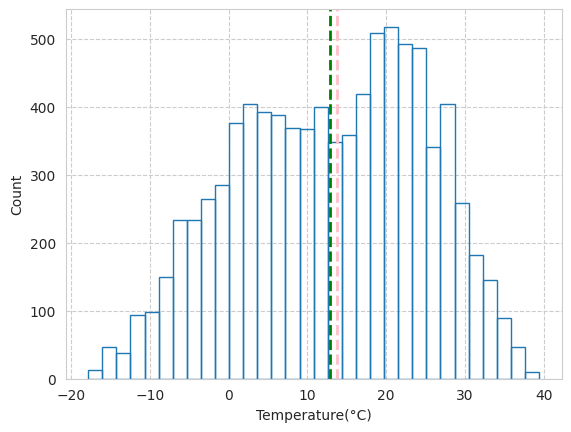

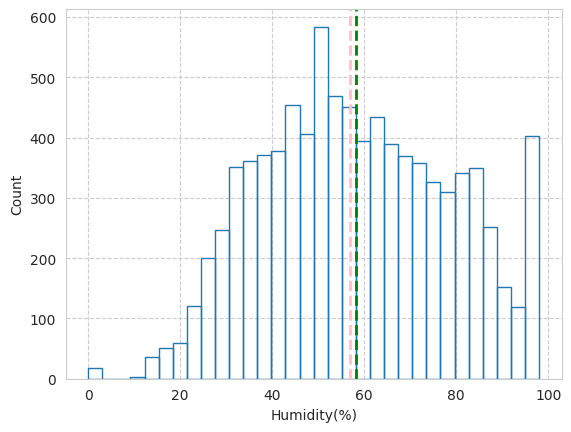

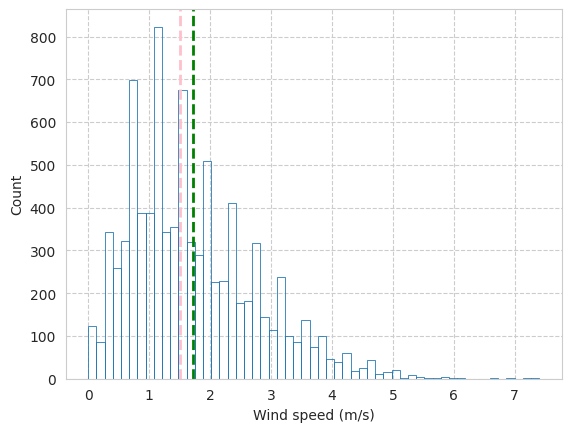

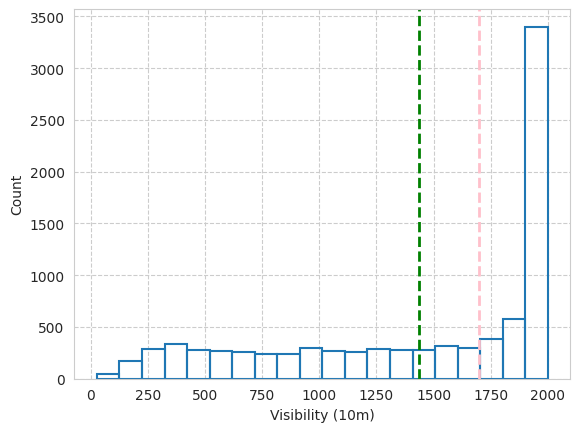

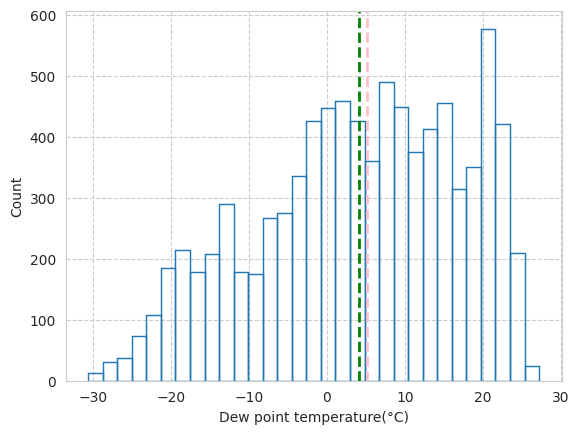

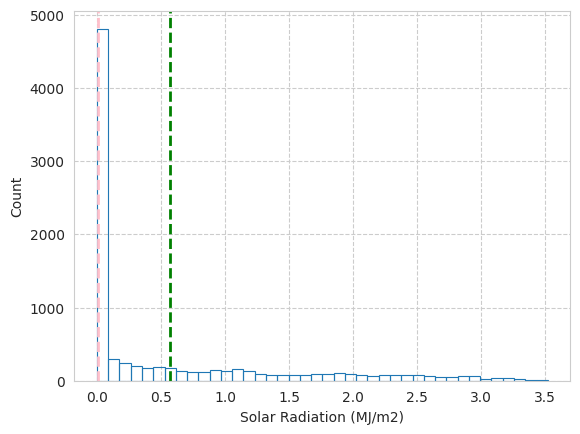

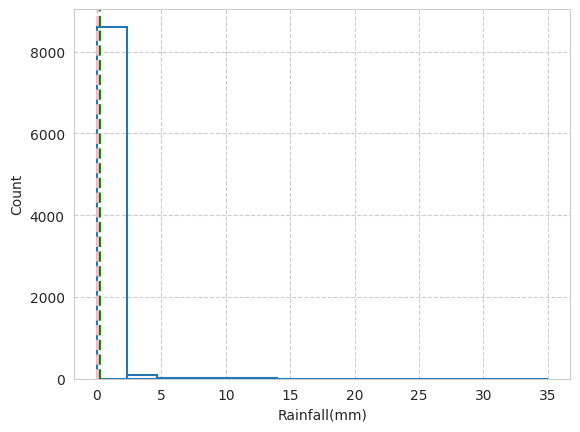

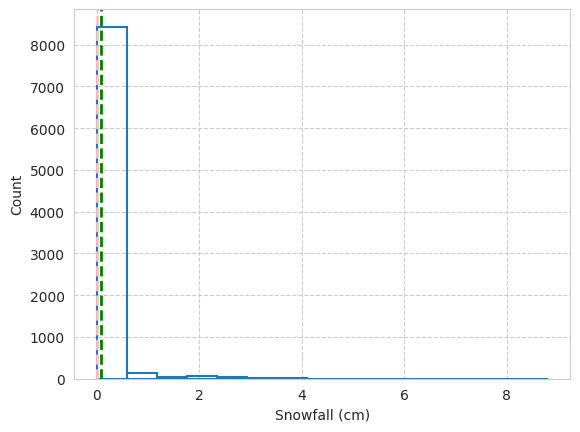

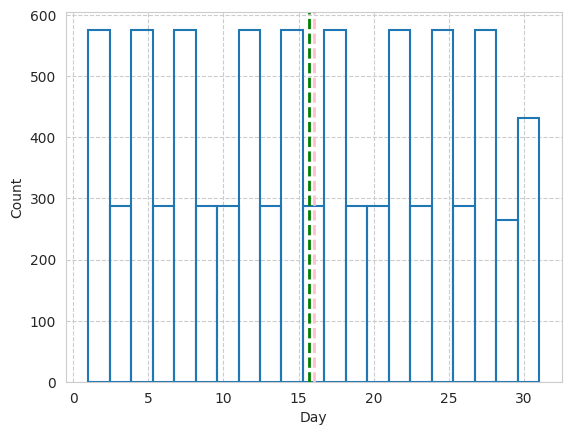

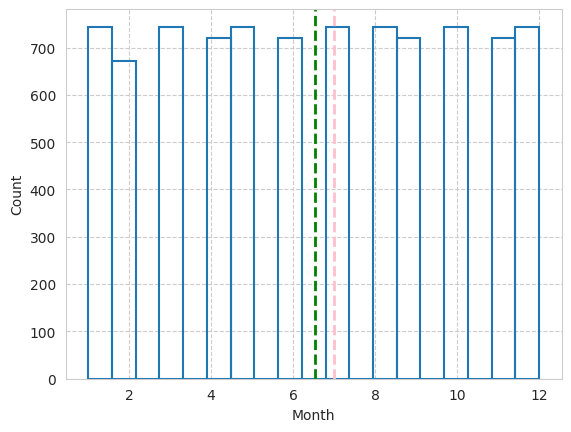

In [ ]:
#Histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bike_df[column]
    sns.histplot(num_feature , fill = False)
    plt.axvline(num_feature.mean(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(num_feature.median(), color='pink', linestyle='dashed', linewidth=2)

    plt.show()

The variables 'Wind Speed', 'Solar Radiation', 'Rainfall', and 'Snowfall' exhibit a positive skew in their distributions, indicating a tendency towards lower values with a longer tail on the right side.

Conversely, 'Visibility' demonstrates a negative skew in its distribution, suggesting that the majority of values are concentrated towards higher values with a longer tail on the left side.







To find out outliers present in these features , we use Boxplot.

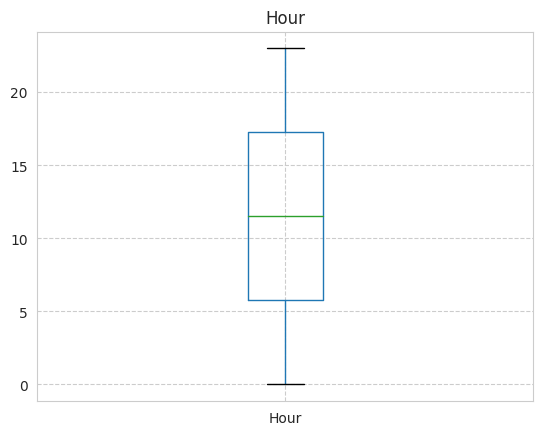

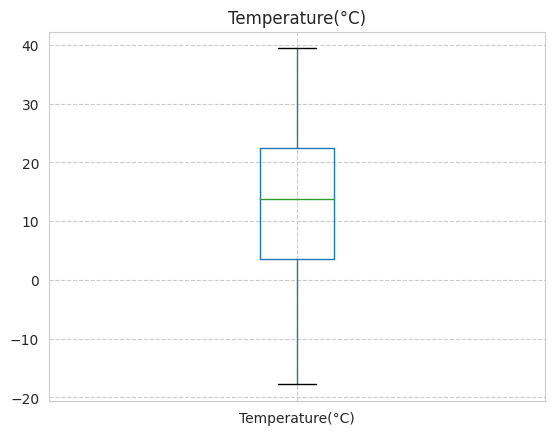

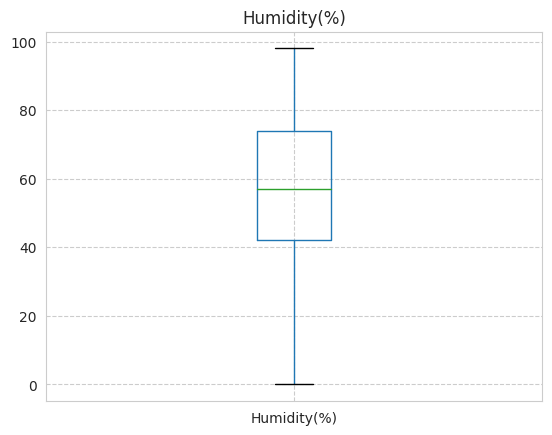

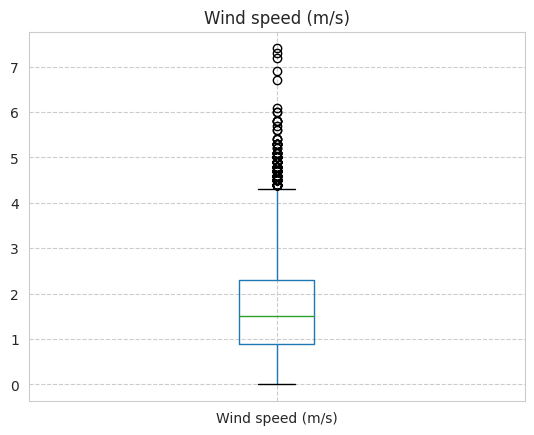

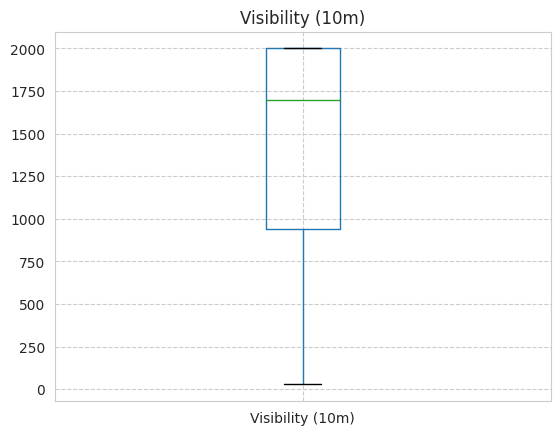

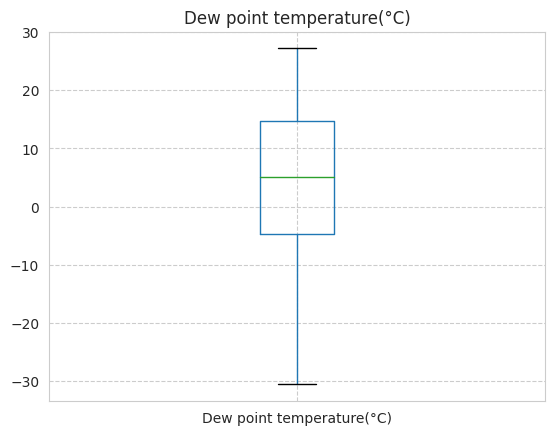

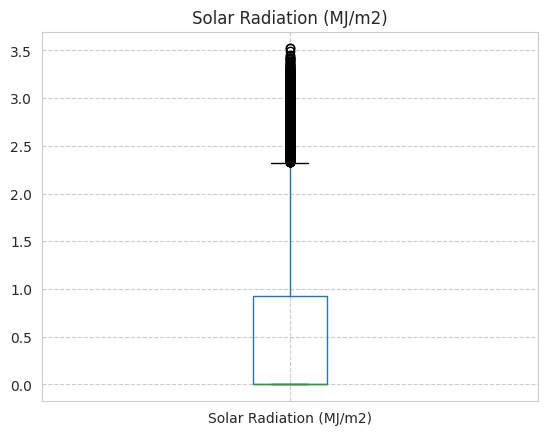

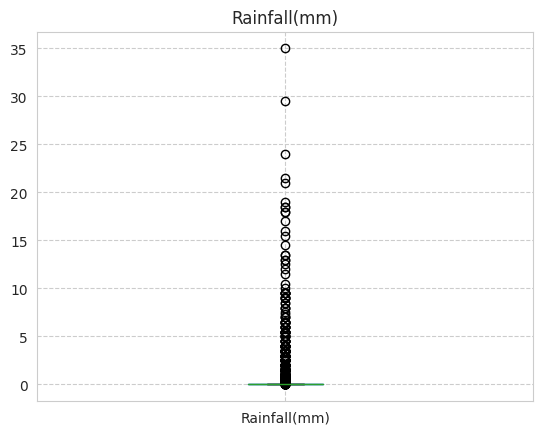

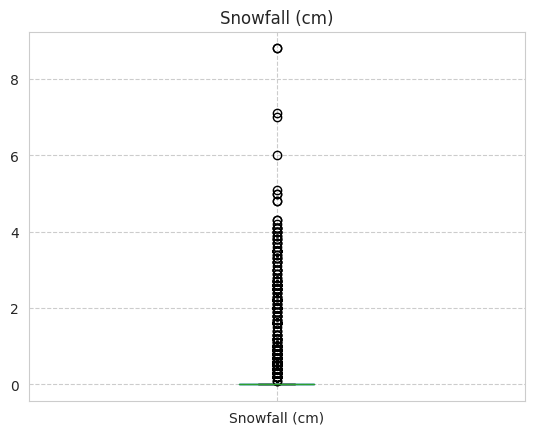

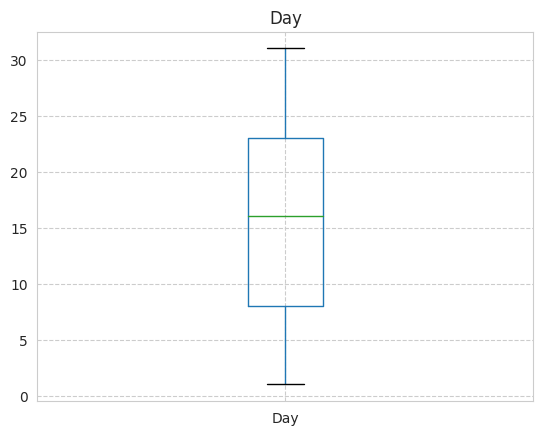

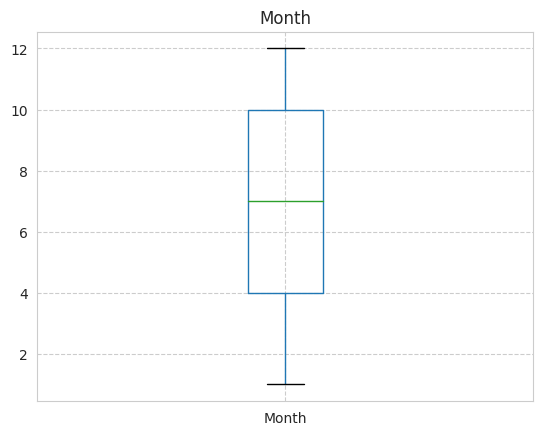

In [ ]:
# Boxplot for each numerical feature
for column in numerical_variables:
    figure = plt.figure()
    ax = figure.gca()
    bike_df.boxplot(column, ax = ax)
    ax.set_title(column)
plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.We can remove these outliers using different transformation technique.

## Categorical Variables

In [ ]:
#list of categorical variables
categorical_variables = bike_df.select_dtypes(include = "object" )
categorical_variables

Seasons     Holiday Functioning Day Day_of_week
0     Winter  No Holiday             Yes      Friday
1     Winter  No Holiday             Yes      Friday
2     Winter  No Holiday             Yes      Friday
3     Winter  No Holiday             Yes      Friday
4     Winter  No Holiday             Yes      Friday
...      ...         ...             ...         ...
8755  Autumn  No Holiday             Yes      Friday
8756  Autumn  No Holiday             Yes      Friday
8757  Autumn  No Holiday             Yes      Friday
8758  Autumn  No Holiday             Yes      Friday
8759  Autumn  No Holiday             Yes      Friday

[8760 rows x 4 columns]

In [ ]:
#find unique values in "Seasons"
list(bike_df['Seasons'].unique())

['Winter', 'Spring', 'Summer', 'Autumn']

In [ ]:
#find unique values in "Holiday"
list(bike_df['Holiday'].unique())

['No Holiday', 'Holiday']

In [ ]:
#find unique values in "Functioning Day"
list(bike_df['Functioning Day'].unique())

['Yes', 'No']

In [ ]:
#find unique values in "Day_of_week"
list(bike_df['Day_of_week'].unique())

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

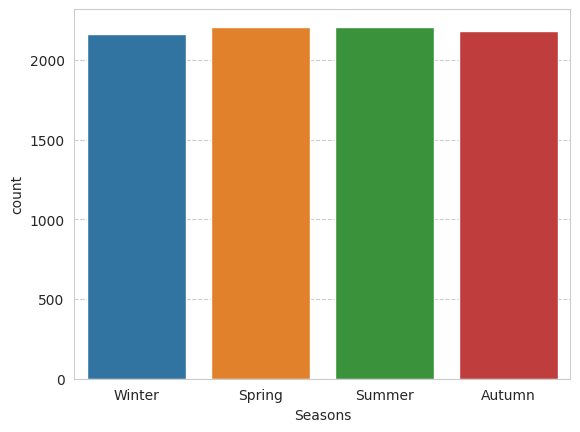

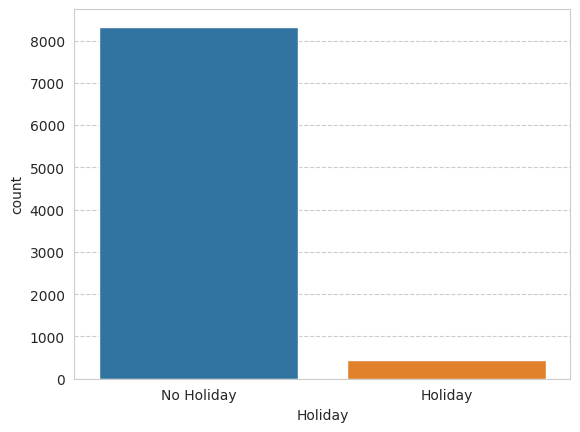

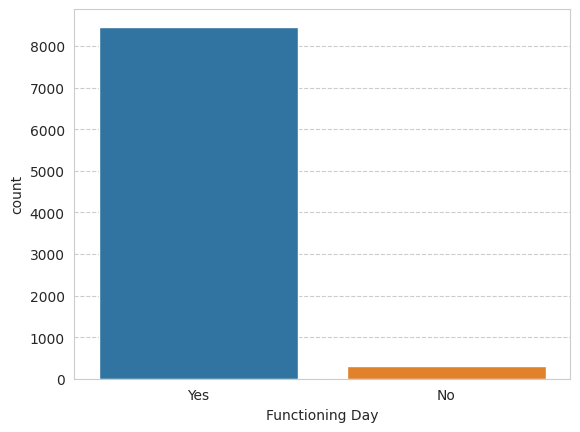

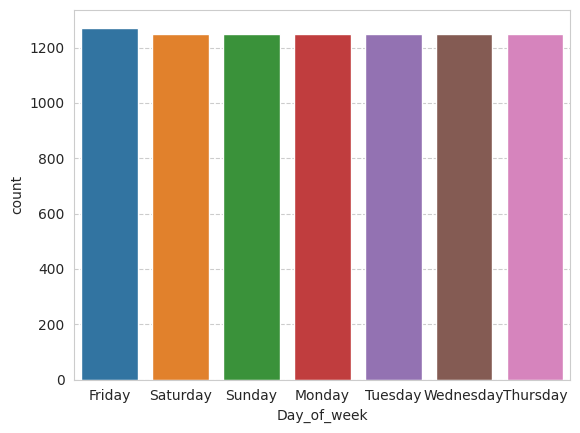

In [ ]:
#countplot
for column in list(categorical_variables):
  sns.countplot(data = bike_df , x = column )
  plt.show()

It appears that during each season, most weekdays are functional days with very few holidays or non-functional days.

The count of non-holiday days is notably larger compared to holidays, especially just before holidays.







## Bivariate Analysis

### Numerical Variable vs "Rented Bike Count"

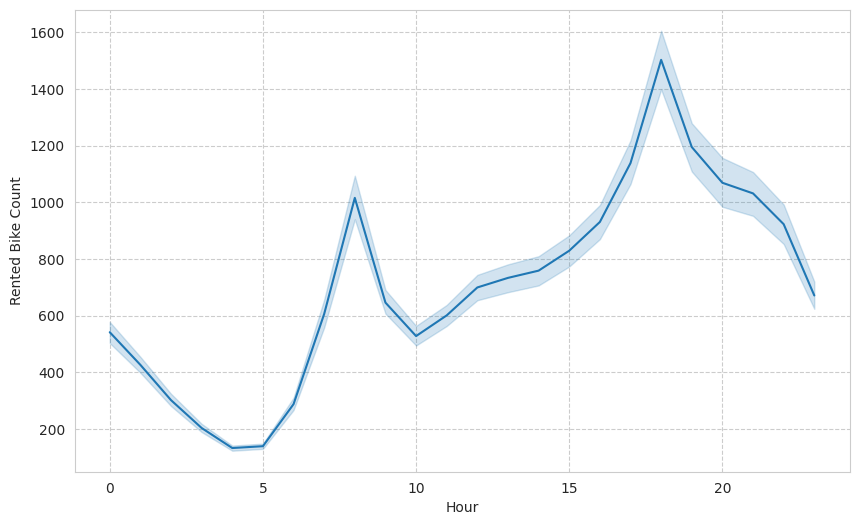

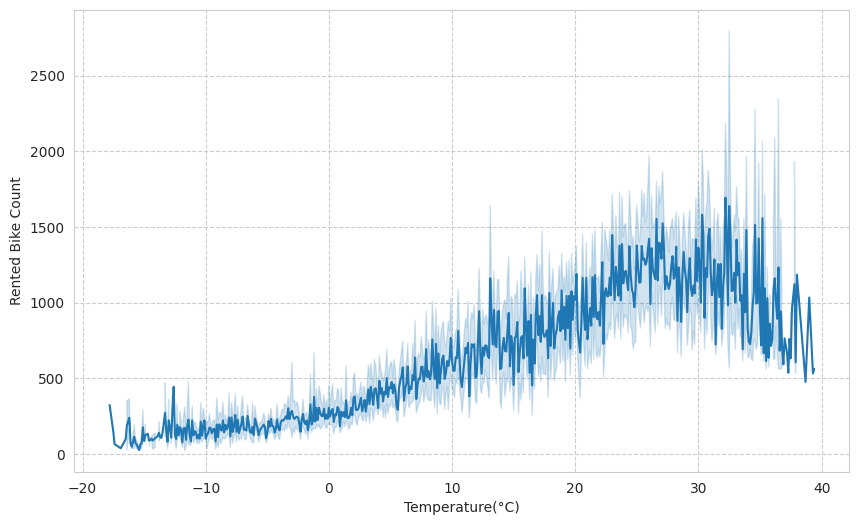

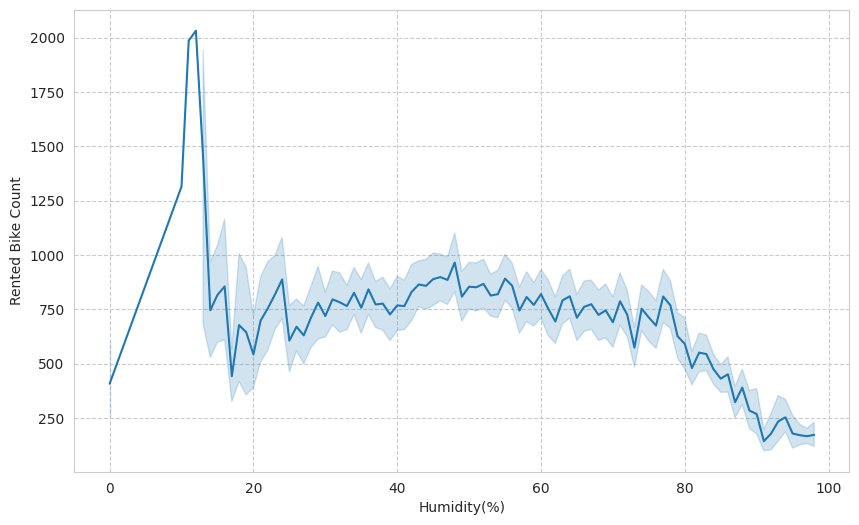

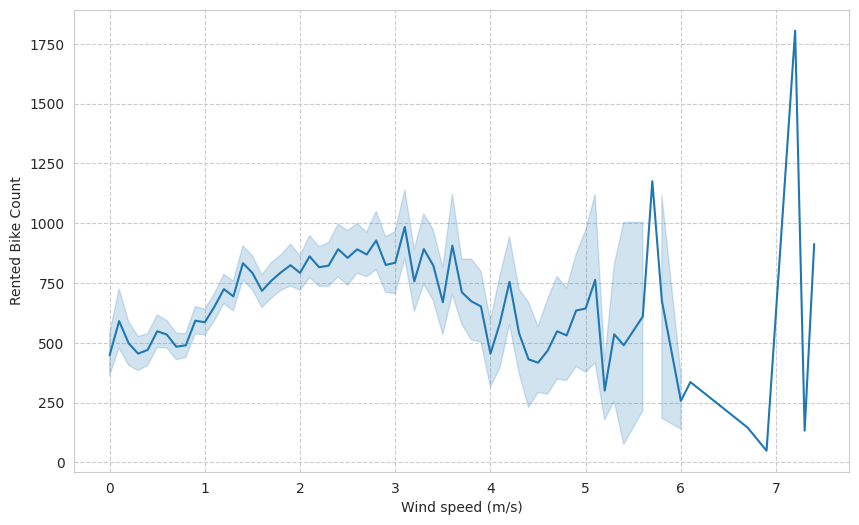

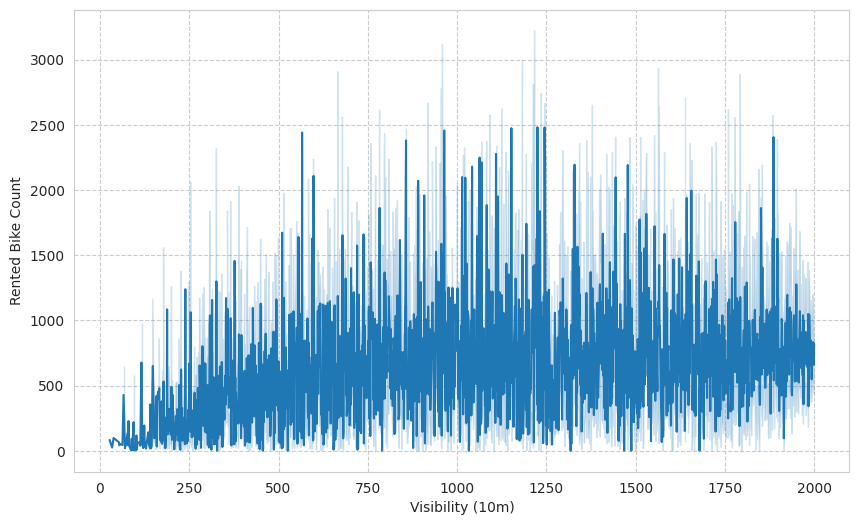

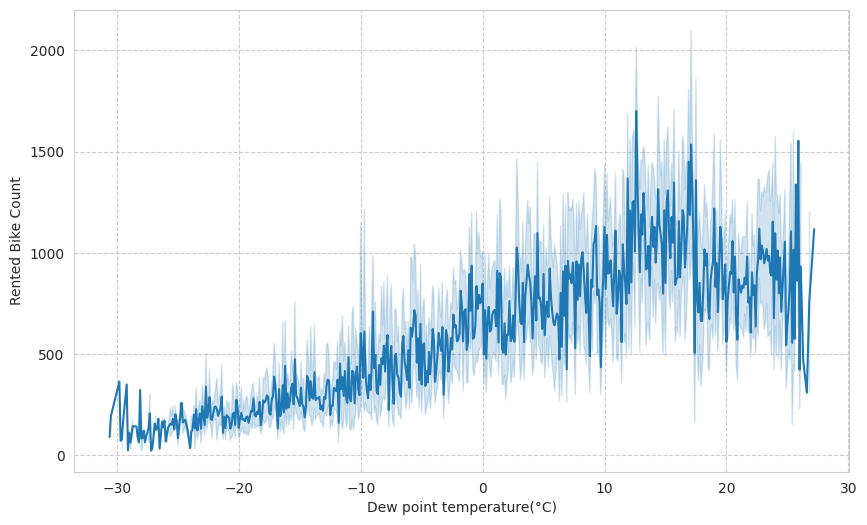

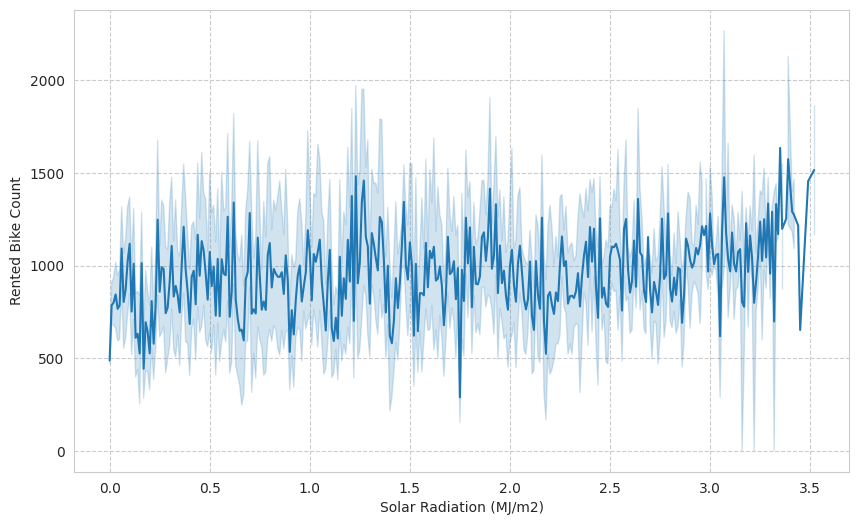

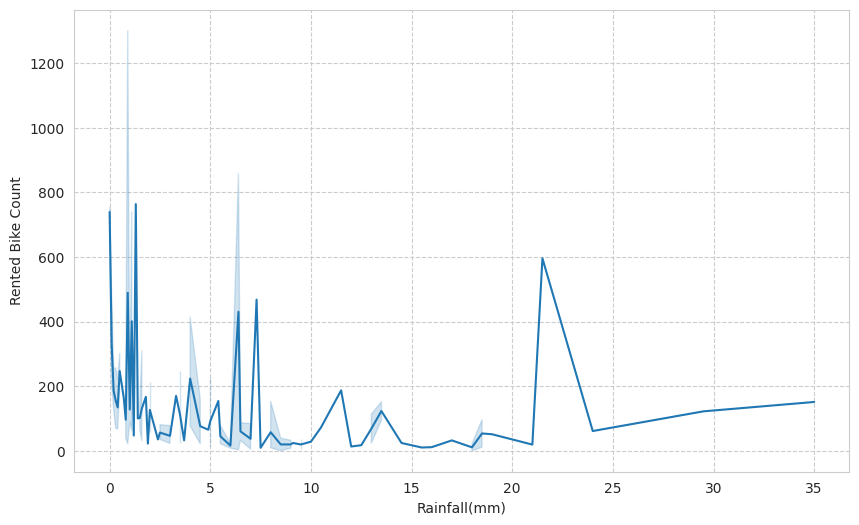

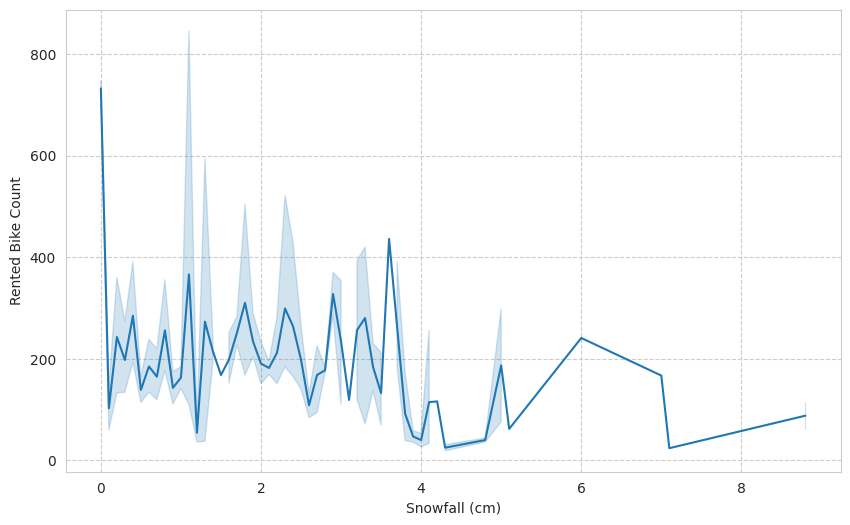

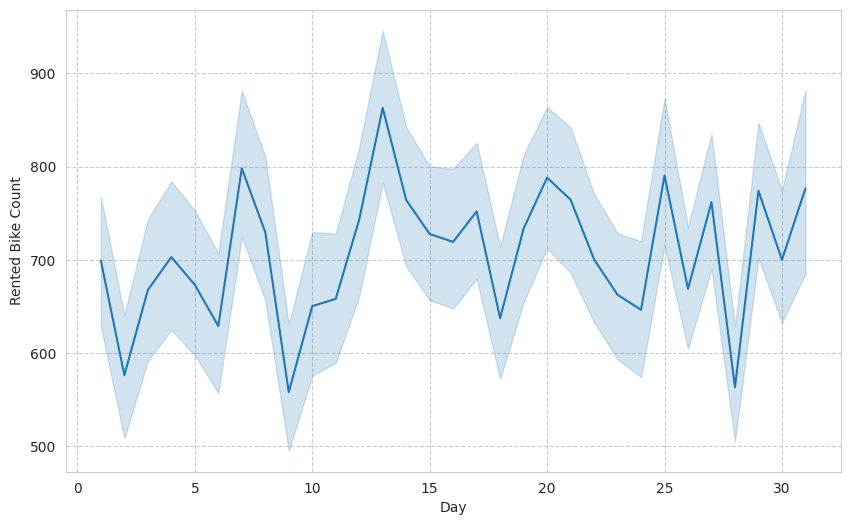

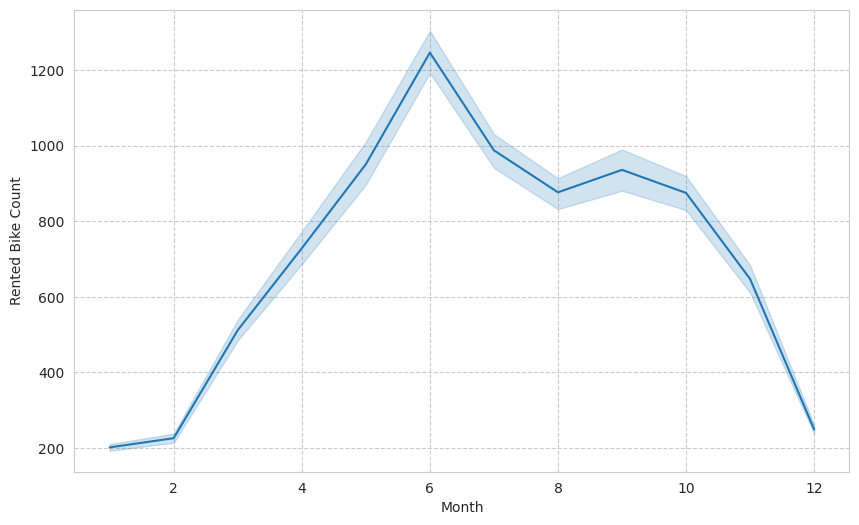

In [ ]:
for column in numerical_variables:
  plt.figure(figsize=(10,6))
  sns.lineplot(x=column,y='Rented Bike Count',data=bike_df,palette='Grouped')
  plt.show()

##Observations

Temperature Influence: The bike count peaks in the afternoon, particularly from 15:00 to 20:00, coinciding with relatively high temperatures around 25°C on average. This suggests that people prefer biking during warmer conditions.

Humidity and Snowfall Impact: An increase in humidity and snowfall correlates with a decrease in bike counts, indicating an inverse relationship between these factors and bike rentals.

Solar Radiation: It appears that solar radiation doesn't significantly affect bike rental counts, showing no apparent impact.

Rainfall Influence: Surprisingly, heavy rainfall doesn't notably reduce bike rental demand. Even with 20 mm of rain, there is a significant peak in rented bike counts.

Holiday Influence: The count of rented bikes remains relatively consistent throughout the weekdays, suggesting that the number of holidays has minimal impact on bike rental demand.

Seasonal Trend: Bike rental counts peak in July and decline as temperatures drop during winter. During summer, the counts start to rise again.

These observations provide valuable insights into how different weather conditions and seasonal variations influence bike rental demand, highlighting the factors that significantly impact or have little effect on the number of rented bikes.








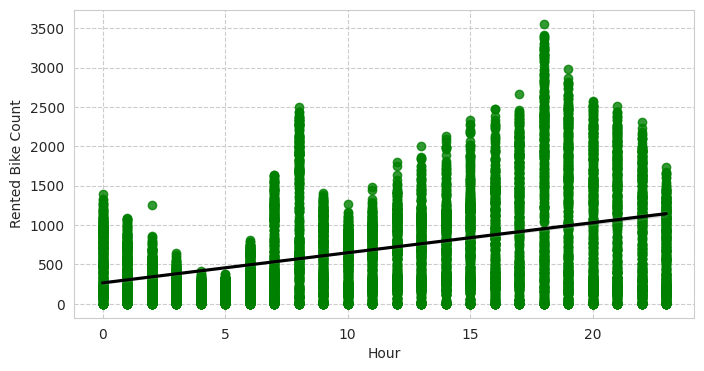

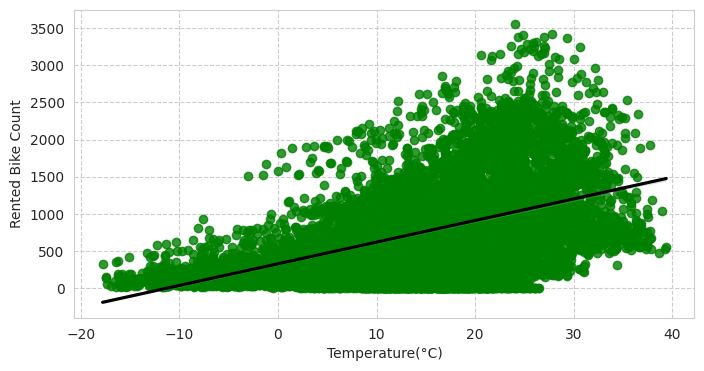

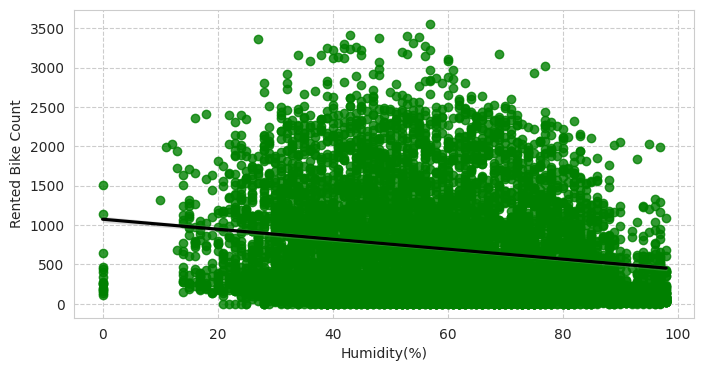

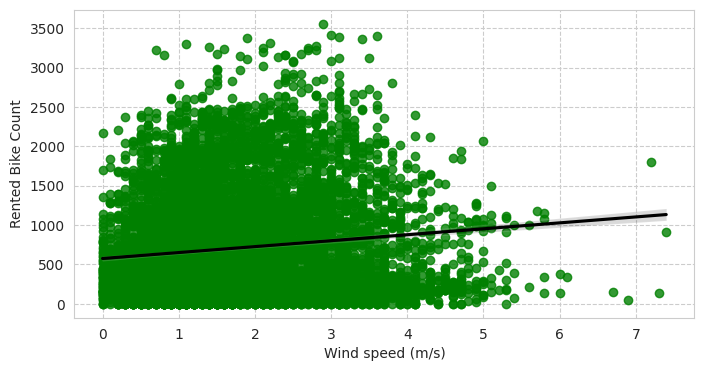

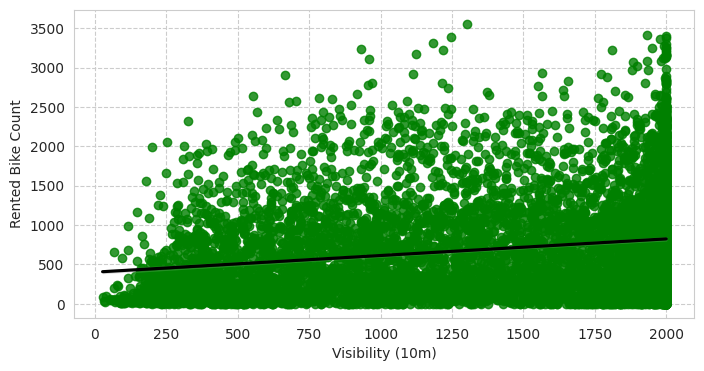

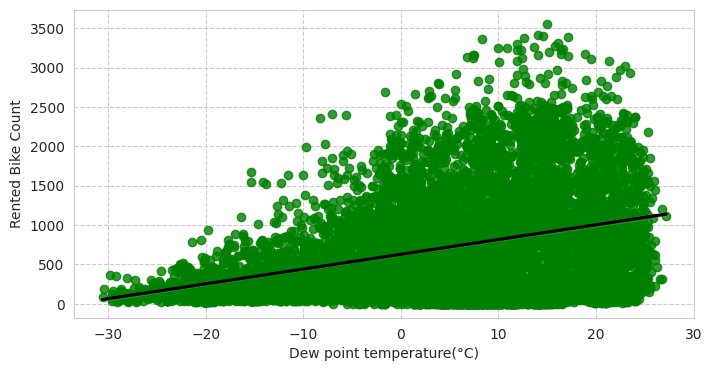

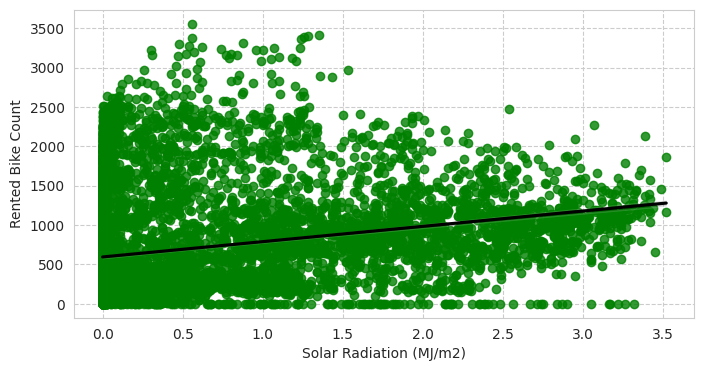

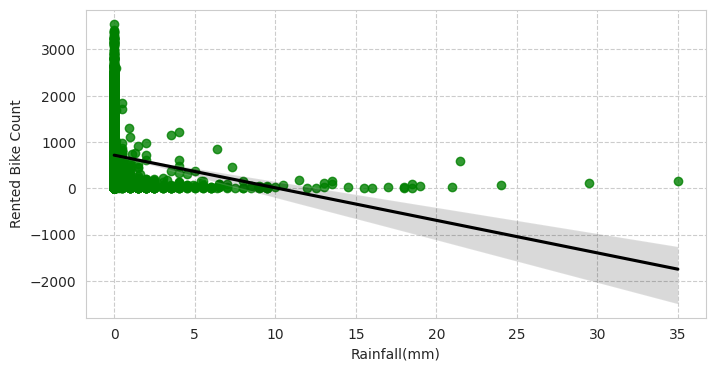

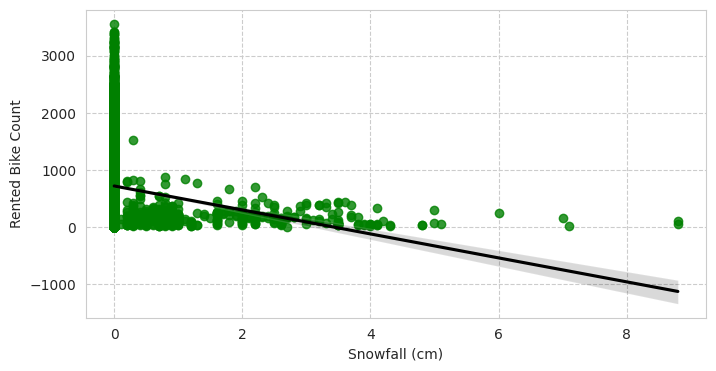

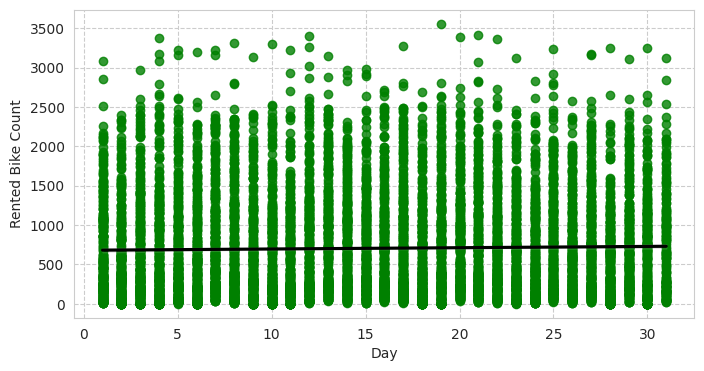

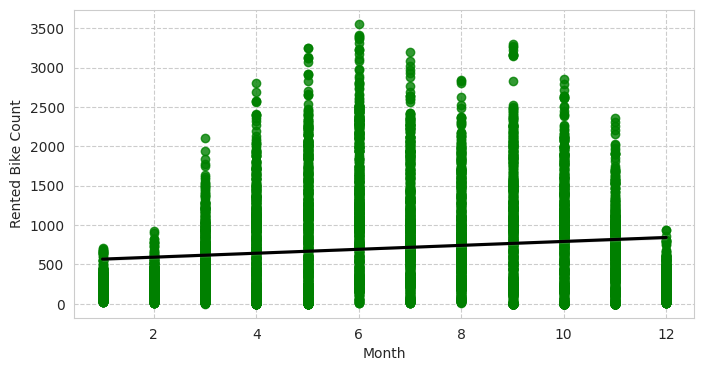

In [ ]:
#printing the regression plot for all the numerical features to understand their linear relationships
for col in numerical_variables:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],scatter_kws={"color": 'green'}, line_kws={"color": "black"})


It's observed that certain columns, namely 'Temperature', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', and 'Hour', demonstrate a positive relationship with the target variable, 'Rented Bike Count'. This indicates that the count of rented bikes is directly proportional to these features. As these features increase, the count of rented bikes tends to increase as well.

Conversely, the count of rented bikes decreases with an increase in features such as 'Rainfall', 'Snowfall', and 'Humidity'. This negative relationship implies that as these weather-related features increase, the count of rented bikes tends to decrease

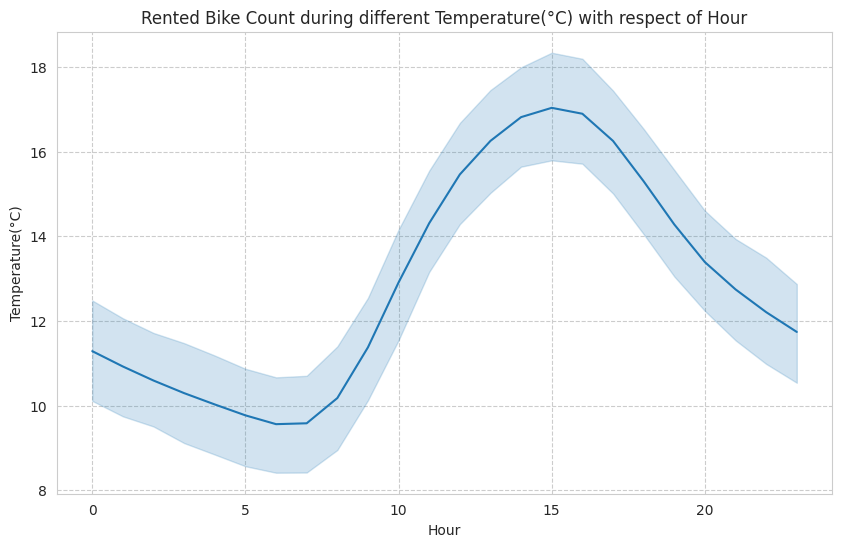

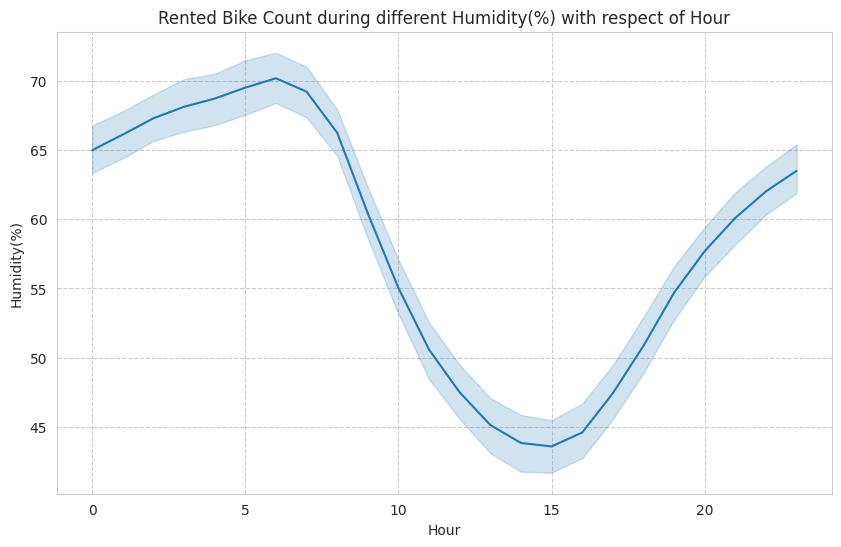

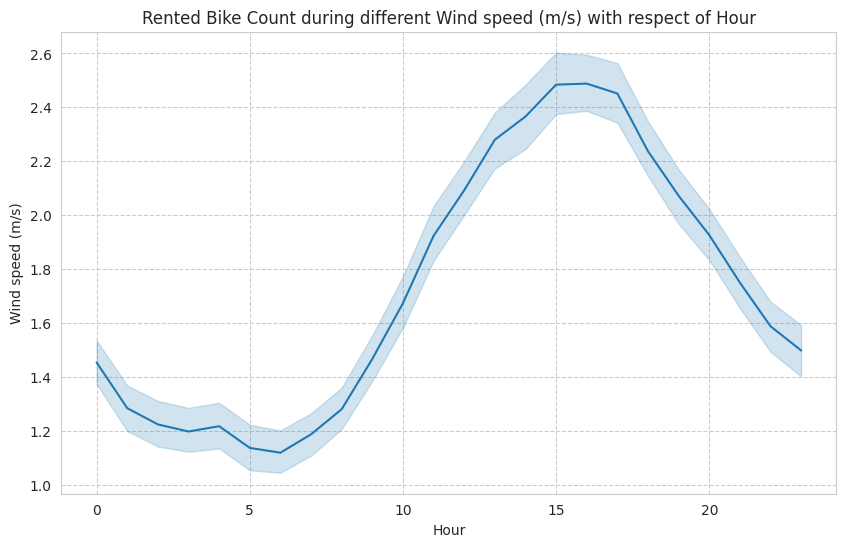

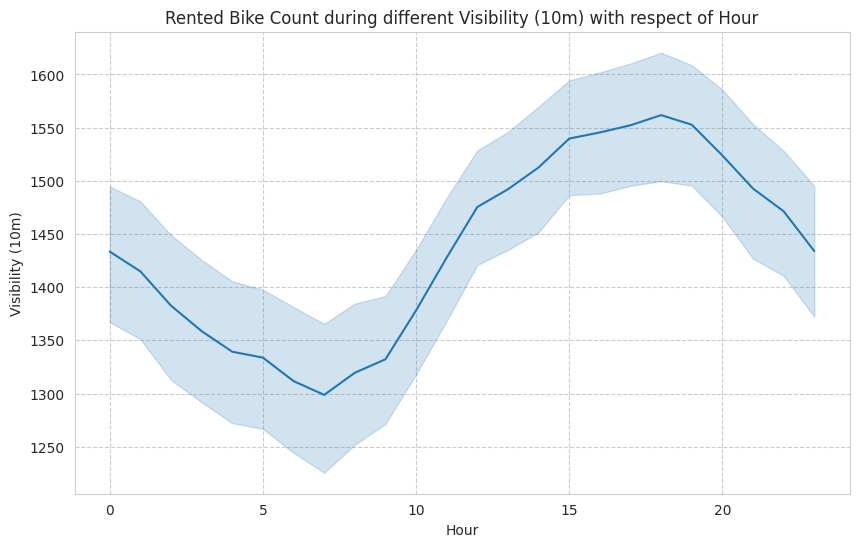

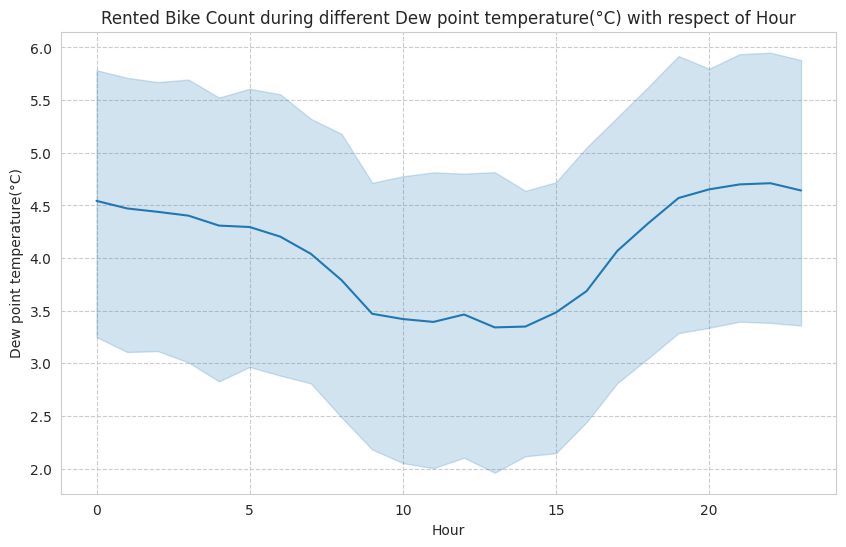

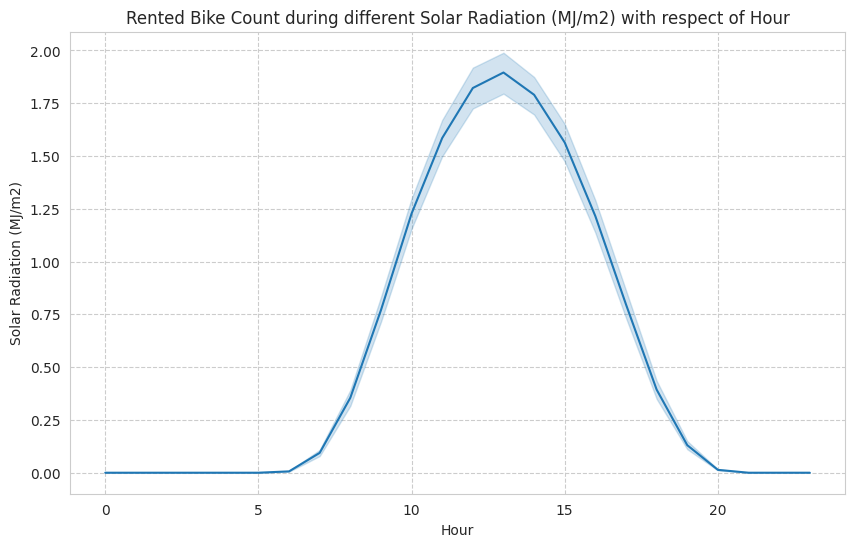

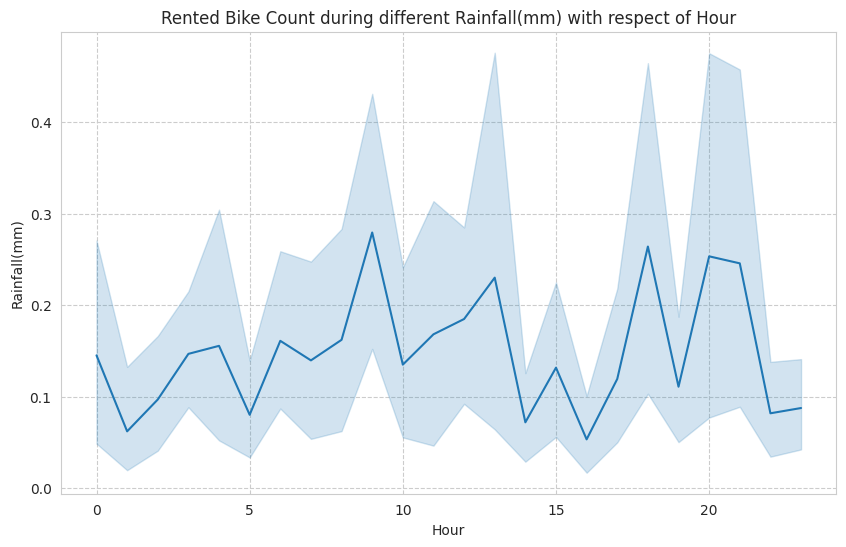

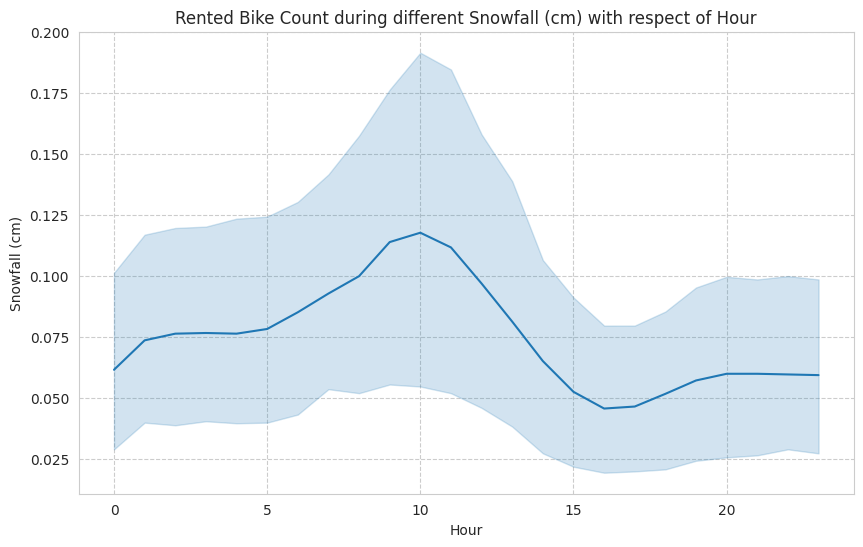

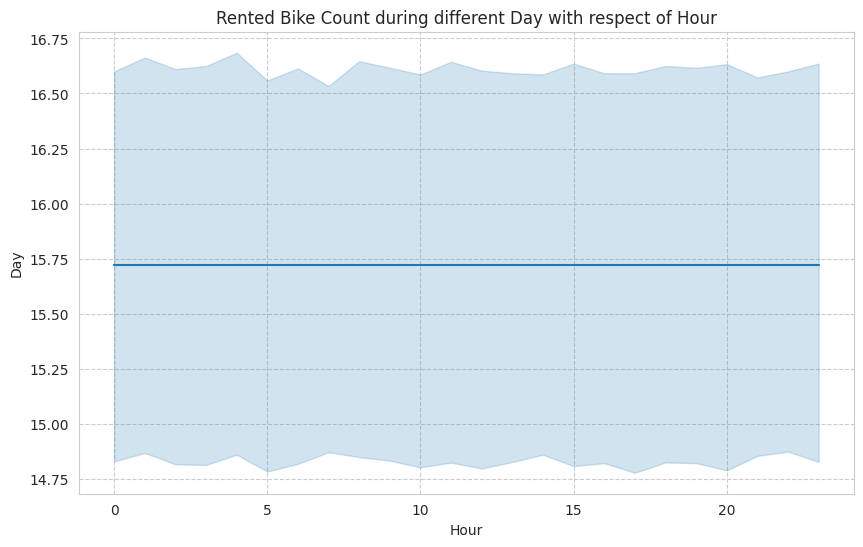

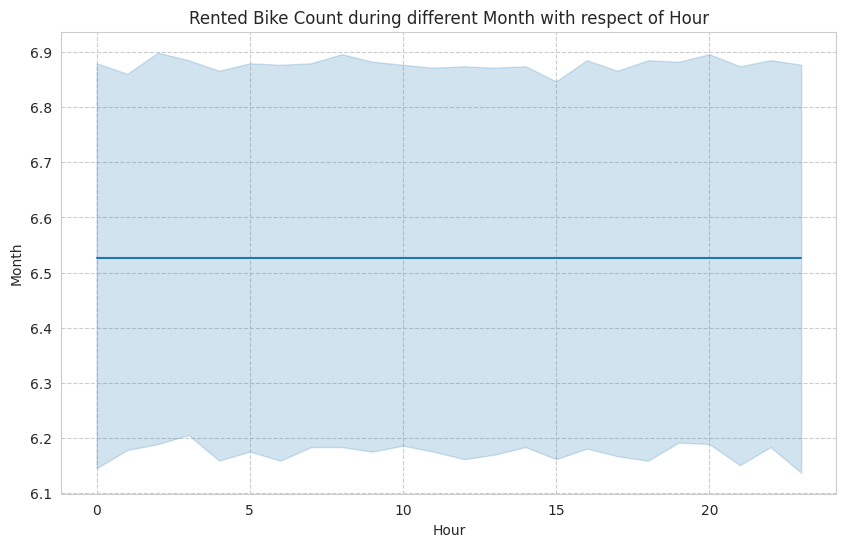

In [ ]:
#spread of Numerical variables across "Hour"
for i in numerical_variables:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=bike_df["Hour"],y=bike_df[i],data = bike_df)
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

## Observation :
* At the beginning of the day the demand of rental bike increases with the highest peak in the evening and later decreasing.
* The demand of rental bike is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Temperature, wind speed, solar radiation also increases and are at the peak in afternoon.

### Categorical Variables vs Rented Bike Count

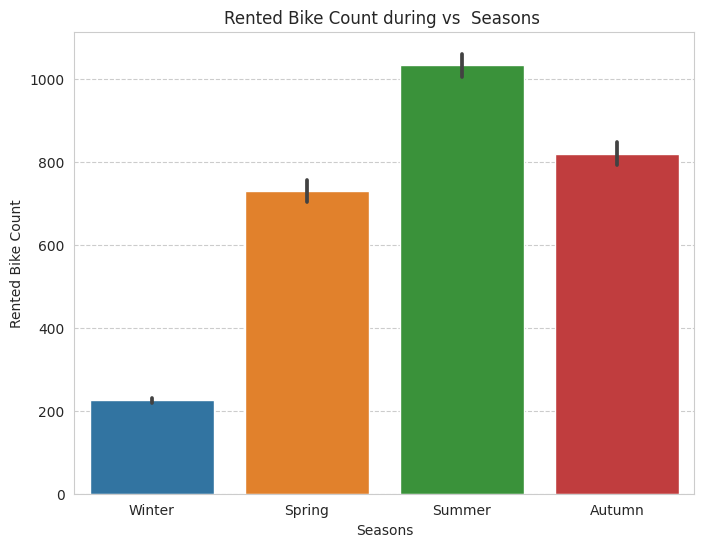

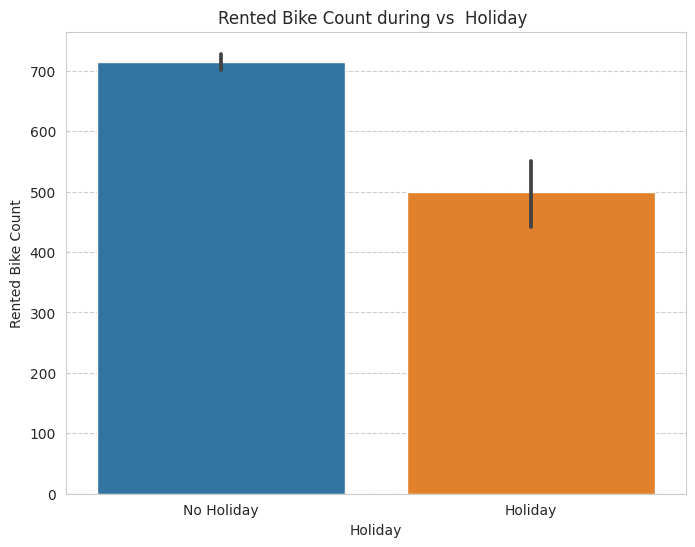

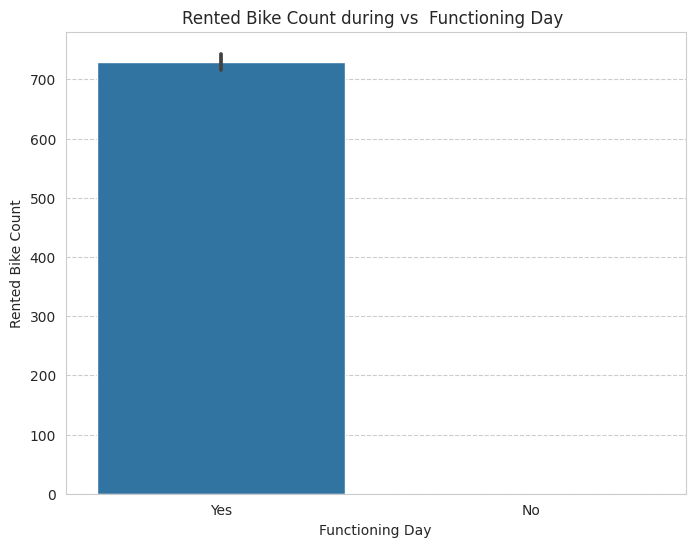

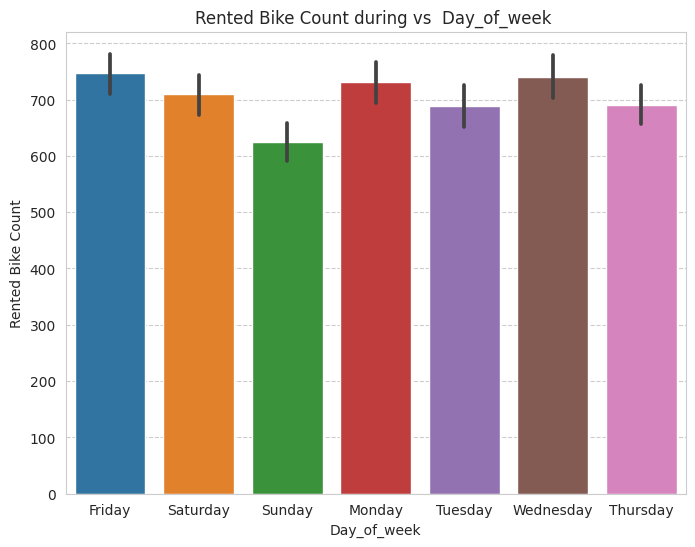

In [ ]:
#Barplot
for i in categorical_variables:
    plt.figure(figsize=(8,6))
    sns.barplot(x=bike_df[i],y=bike_df['Rented Bike Count'])
    plt.title(f"Rented Bike Count during vs  {i} ")
    plt.show()

###Observations:
* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer
* We have seen there are less holidays so obviously rented bike count is also less on holidays.
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

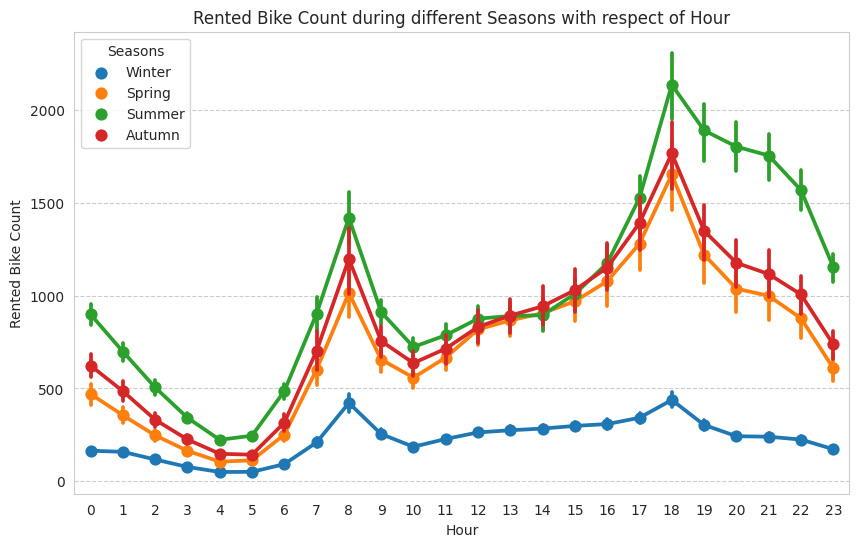

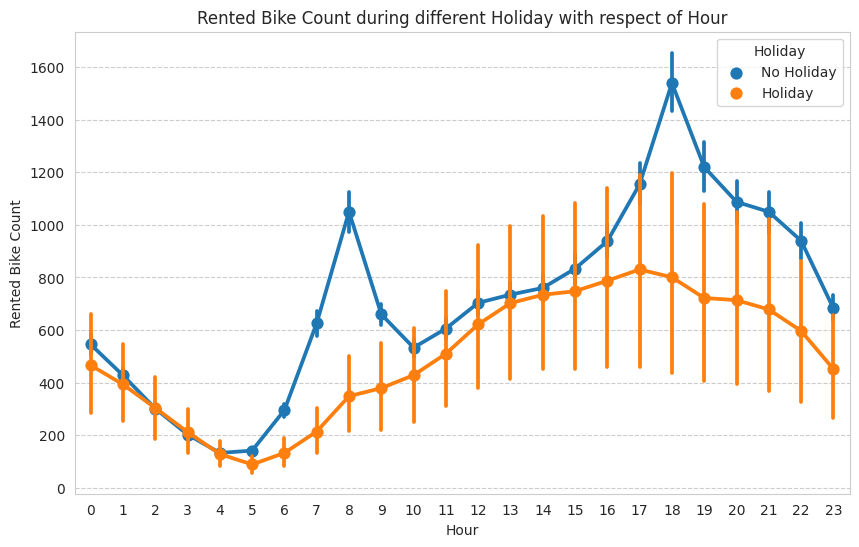

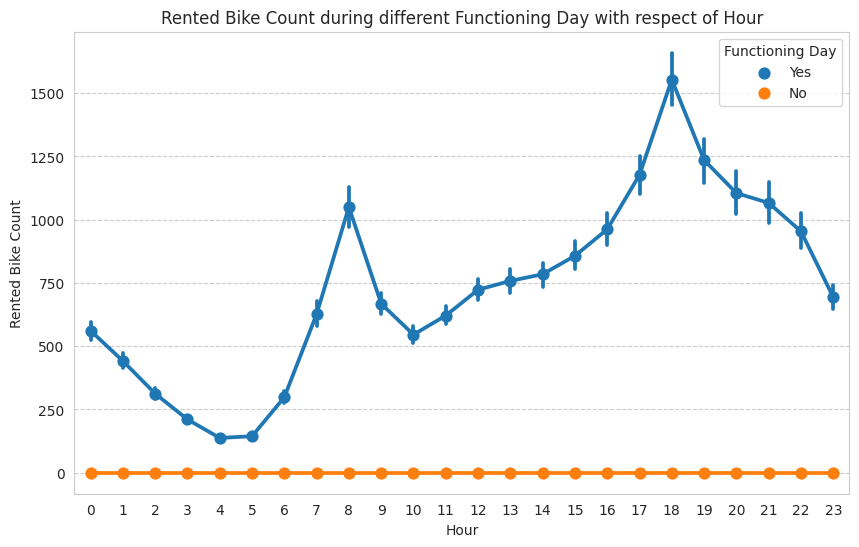

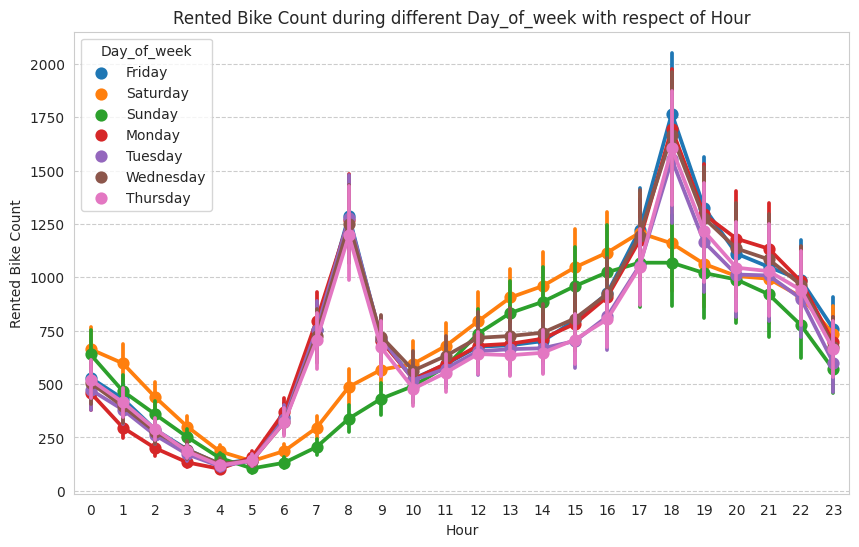

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_variables:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,6))
    sns.pointplot(x=bike_df["Hour"],y=bike_df['Rented Bike Count'],hue=bike_df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

## Observations:
* Demand of bikes is very less in Winters and its extremely high during summers.
* Demand of bikes is extremely high for all the week days and slightly less on weekends like Sunday and Saturday. In the weekend the demand becomes high in the afternoon.
* In the Functioning Day column, If there is no Functioning Day then there is no demand.
* Non holidays have more demand because of office days maybe.

## Feature Selection

### Correlation

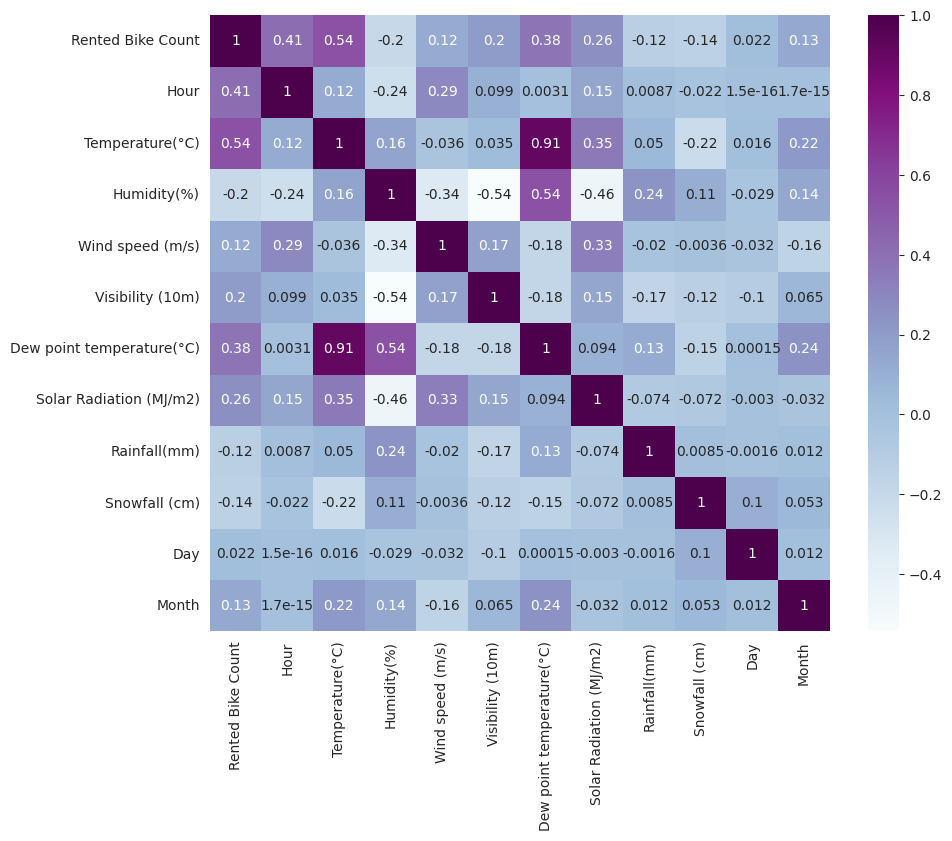

In [ ]:
#correlation matrix
correlation_df= bike_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, cmap= 'BuPu');

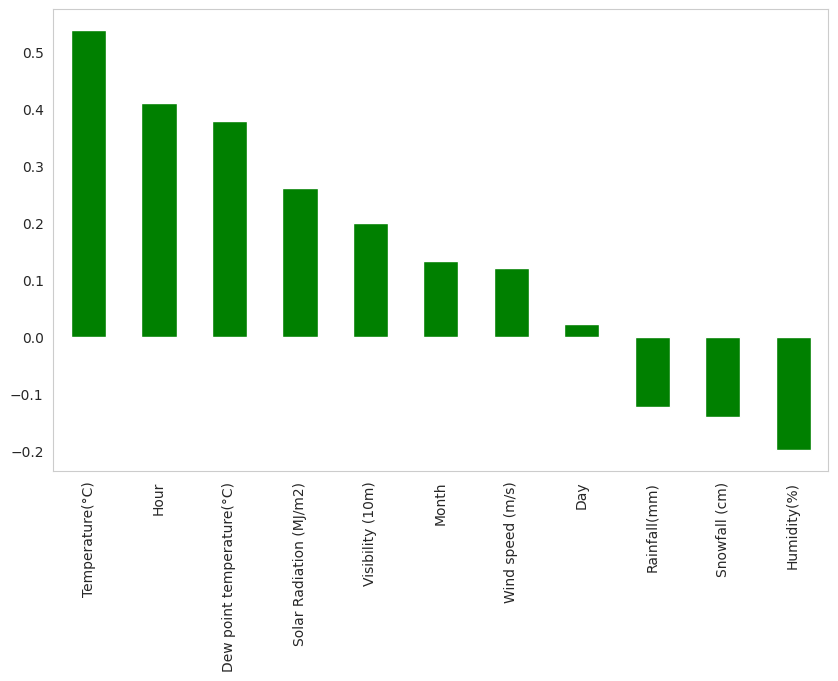

In [ ]:
#Bar correlation
corr_target = bike_df.corr()['Rented Bike Count'].sort_values(ascending = False)

plt.figure(figsize = (10,6))
corr_target[1:].plot(kind = 'bar', color = 'green')
plt.grid()
plt.show()


The most correlated features to the rented bike count are:

* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)


temperature and Dew point temperature are almost 0.91 correlated, So it generates multicollinearity issue.


## Handeling Multicollinearity issue with VIF

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit.
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
#calling function
calculate_vif(bike_df[[col for col in numerical_variables]]).T


0                1            2                 3   \
variables     Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
VIF        4.42596        38.389623     8.344305          4.879565   

                         4                          5   \
variables  Visibility (10m)  Dew point temperature(°C)   
VIF                9.481423                  19.815223   

                                6             7              8         9   \
variables  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Day   
VIF                       2.900819      1.082134       1.144168  4.292003   

                 10  
variables     Month  
VIF        5.096115

* Here Temperature(°C) and 	Dew point temperature(°C) have high correlation VIF value.They can make whole regression model unstable.

* We need to drop one of the feature so that VIF value get reduced.

In [ ]:
#calling function VIF where Dew point temperature(°C)' , 'Day' , 'Month'are not included
calculate_vif(bike_df[[col for col in numerical_variables if col not in ['Dew point temperature(°C)' , 'Day' , 'Month']]]).T

0                1            2                 3  \
variables      Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
VIF        3.921832         3.228318     4.868221          4.608625   

                          4                        5             6  \
variables  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)   
VIF                 4.71017                 2.246791      1.079158   

                       7  
variables  Snowfall (cm)  
VIF             1.120579

As you can see all these features' VIF values got reduced to under 5.00

In [ ]:
#dropping 'Dew point temperature(°C)' , 'Day' , 'Month'

bike_df = bike_df.drop(['Dew point temperature(°C)' , 'Day' , 'Month'], axis=1)

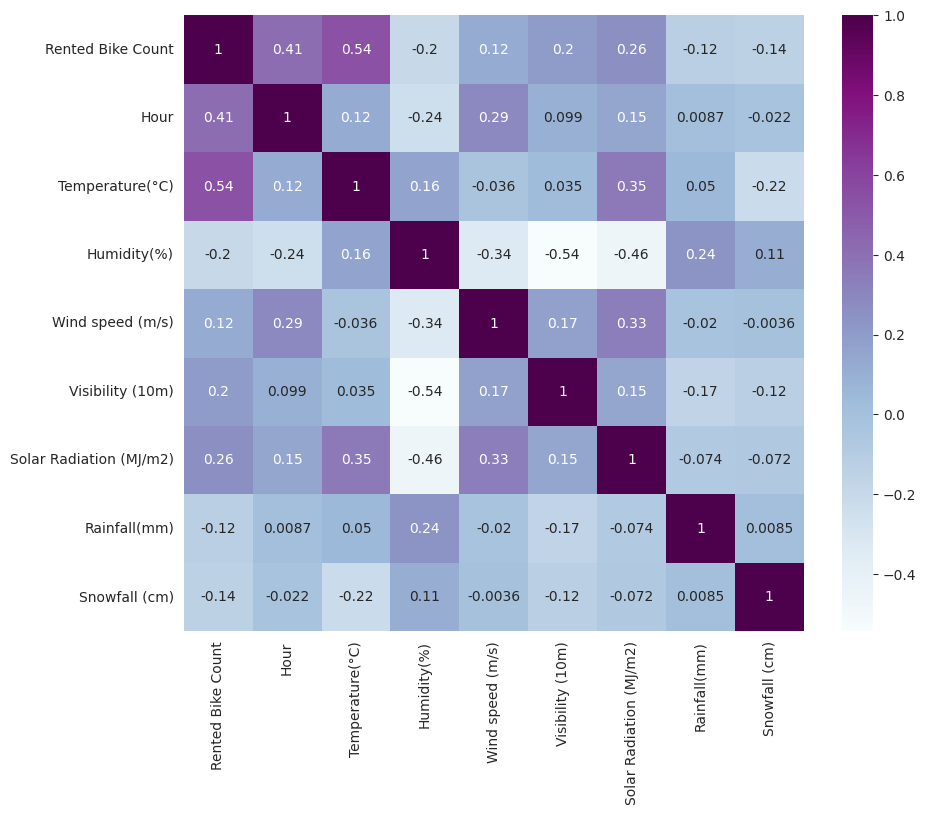

In [ ]:
#correlation matrix
correlation_df= bike_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, cmap= 'BuPu');

## Feature Enginerring

## Feature Creation

In [ ]:
# creating column of weekend or not
bike_df['weekend']= bike_df['Day_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df.drop('Day_of_week', axis=1, inplace=True)


## Label Encoding

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

bike_df[['Seasons','Holiday','Functioning Day']] = bike_df[['Seasons','Holiday','Functioning Day']].apply(label_encoding.fit_transform)


In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  weekend  
0        3        1                1        0  
1        3        1                1        0  
2        3        1                1        0  
3        3        1                1        0  
4        3        1                1        0

### Identify Inputs and Targets

In [ ]:
# Identify the input columns (a list of column names)
X = bike_df.drop('Rented Bike Count' , axis = 1)
Y = np.sqrt(bike_df["Rented Bike Count"] )

In [ ]:
#checking shapes
X.shape , Y.shape

((8760, 12), (8760,))

we can conclude that there are total 8760 datapoints and 12 features and we have to predict dependent variable 'Rented Bike Count'

## Train Test split

In [ ]:
#spliting data into training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.3 , random_state= 0 )

In [ ]:
#shape
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((6132, 12), (6132,), (2628, 12), (2628,))

## Linear Regression

In [ ]:
#creaing instance of an algorithm

linear_reg = LinearRegression()

# fitting Linear Regression model
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#predicting value of Y_test and Y_train
Y_test_pred = linear_reg.predict(X_test)
Y_train_pred = linear_reg.predict(X_train)

In [ ]:
#Y- intercept
c = linear_reg.intercept_
c

-7.367857457543803

In [ ]:
#coeficient array  can be given by
m = linear_reg.coef_
m

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [ ]:
#model scores

#score for training data
print(linear_reg.score(X_train , Y_train))

#score for testing data
print(linear_reg.score(X_test , Y_test))

0.6540967727241054
0.6501226505752835


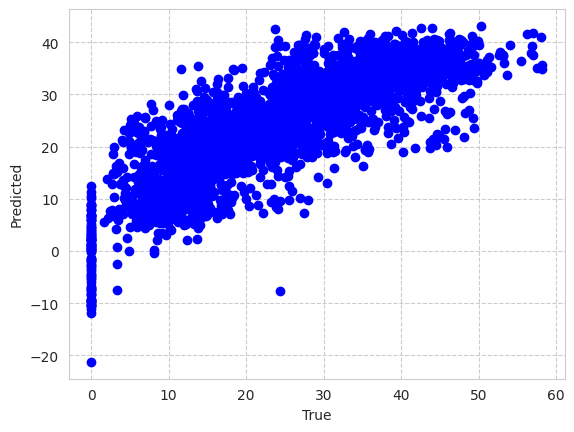

In [ ]:
#scatter plot
plt.scatter(Y_test ,Y_test_pred , color = 'b')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  MSE  = round(mean_squared_error(y_true, y_pred), 2)
  print("MSE :" , MSE)
  RMSE = round(np.sqrt(MSE),2)
  print("RMSE :" ,RMSE)
  MAE= round(mean_absolute_error(y_true, y_pred),2)
  print("MAE :",MAE)
  r2 = round(r2_score(y_true, y_pred),2)
  print("R2 :" ,r2)
  adj_r2 = round(1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
  print("Adjusted R2 :",adj_r2)

  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, Y_train_pred, model='Linear',train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, Y_test_pred, model='Linear',train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).



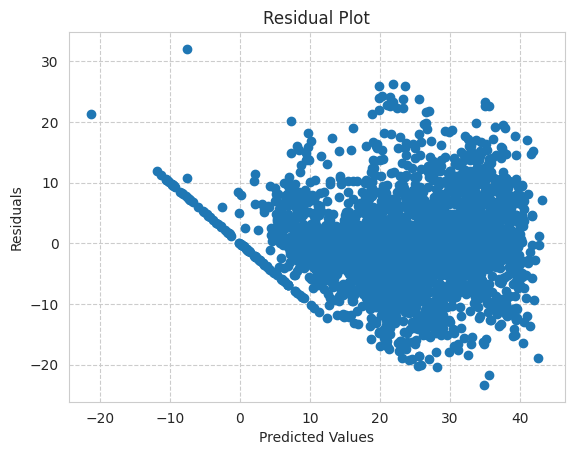

In [ ]:
#Heteroscadacity - Residual plot
plt.scatter((Y_test_pred),(Y_test)-(Y_test_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Lasso Regression and Hyperparameter Tunning

In [ ]:
#creating instance of Lasso algorithm
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [ ]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)

The best fit alpha value : {'alpha': 0.0001}


In [ ]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

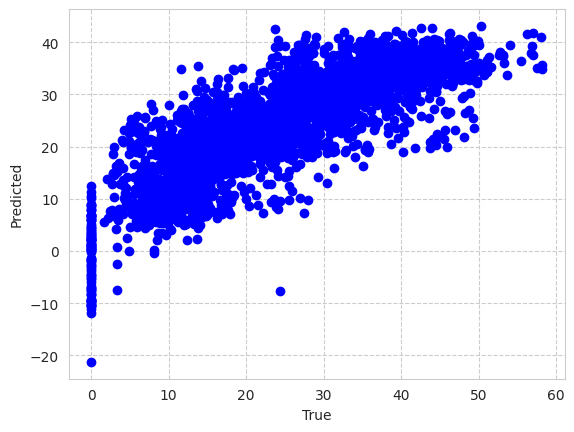

In [ ]:
#scatter plot
plt.scatter(Y_test ,test_pred_lasso , color = 'b')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


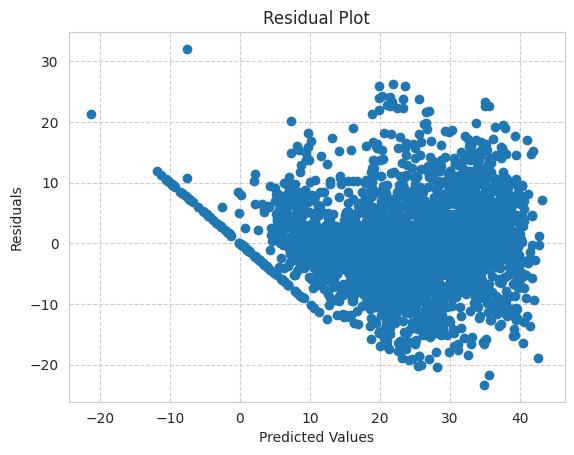

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_pred_lasso),(Y_test)-(test_pred_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Ridge Regression and Hyperparameter Tunning

In [ ]:
#creating instance of Ridge algorithm
ridge = Ridge()

# cross validation
parameters_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters_ridge, cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
print("The best fit alpha value :" ,ridge_regressor.best_params_)

The best fit alpha value : {'alpha': 1e-10}


In [ ]:
# predictions on train and test dataset
train_ridge_pred = ridge_regressor.predict(X_train)
test_ridge_pred = ridge_regressor.predict(X_test)

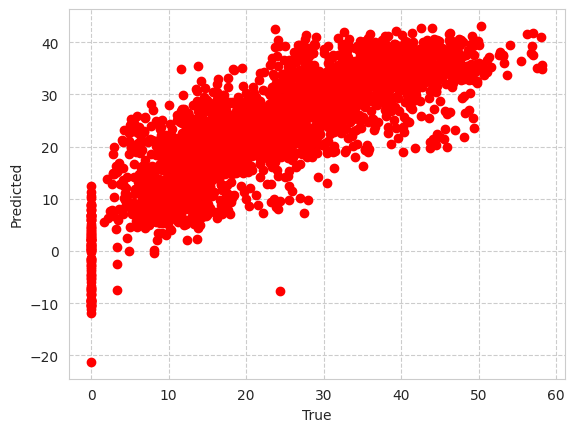

In [ ]:
#scatter plot
plt.scatter(Y_test ,test_ridge_pred  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_ridge_pred, 'Ridge', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_ridge_pred, 'Ridge', train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


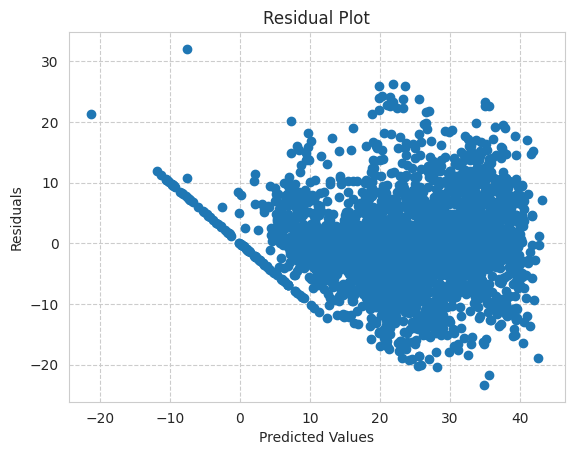

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_ridge_pred),(Y_test)-(test_ridge_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## RandomForrest Regressor and Hyperparameter Tunning

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }

In [ ]:
# create regressor object
rf_model= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,Y_train)

In [ ]:
# best parameters
rf_grid.best_params_

In [ ]:
# optimal model
rf_optimal_model= rf_grid.best_estimator_

In [ ]:
# Model score
rf_optimal_model.score(X_train,Y_train)

0.8579549059710613

In [ ]:
# Making predictions on train and test data
train_pred_rf= rf_optimal_model.predict(X_train)
test_pred_rf= rf_optimal_model.predict(X_test)

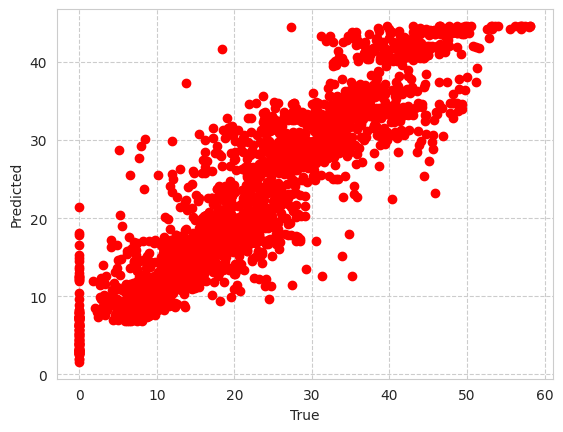

In [ ]:
#scatter plot

plt.scatter(Y_test ,test_pred_rf  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data Evaluation metrics
evaluation_metrics(Y_train, train_pred_rf, 'Random Forest', train=True)

MSE : 22.1
RMSE : 4.7
MAE : 3.39
R2 : 0.86
Adjusted R2 : 0.86


In [ ]:
# Test data Evaluation metrics
evaluation_metrics(Y_test, test_pred_rf, 'Random Forest', train=False)

MSE : 24.84
RMSE : 4.98
MAE : 3.59
R2 : 0.84
Adjusted R2 : 0.84


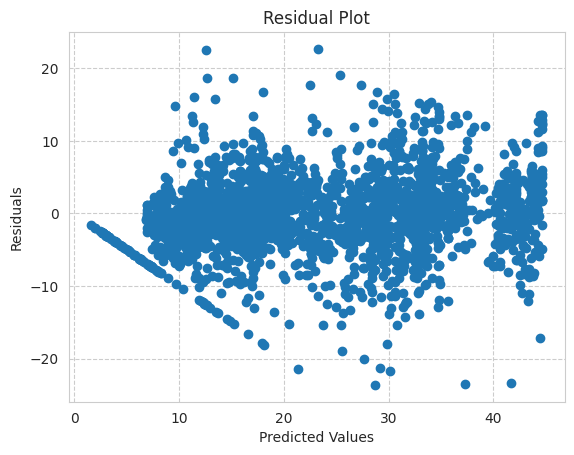

In [ ]:
#Heteroscadacity - Residual plot
plt.scatter((test_pred_rf),(Y_test)-(test_pred_rf))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Feature Importance

In [ ]:
#important features

importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
#rounding off

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#sorting values
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.31
0                      Hour                0.26
10          Functioning Day                0.16
2               Humidity(%)                0.11
6              Rainfall(mm)                0.06
8                   Seasons                0.06
5   Solar Radiation (MJ/m2)                0.03
11                  weekend                0.01
3          Wind speed (m/s)                0.00
4          Visibility (10m)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:

#FIT THE MODEL
rf_optimal_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [ ]:
#sort
features = X_train.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)


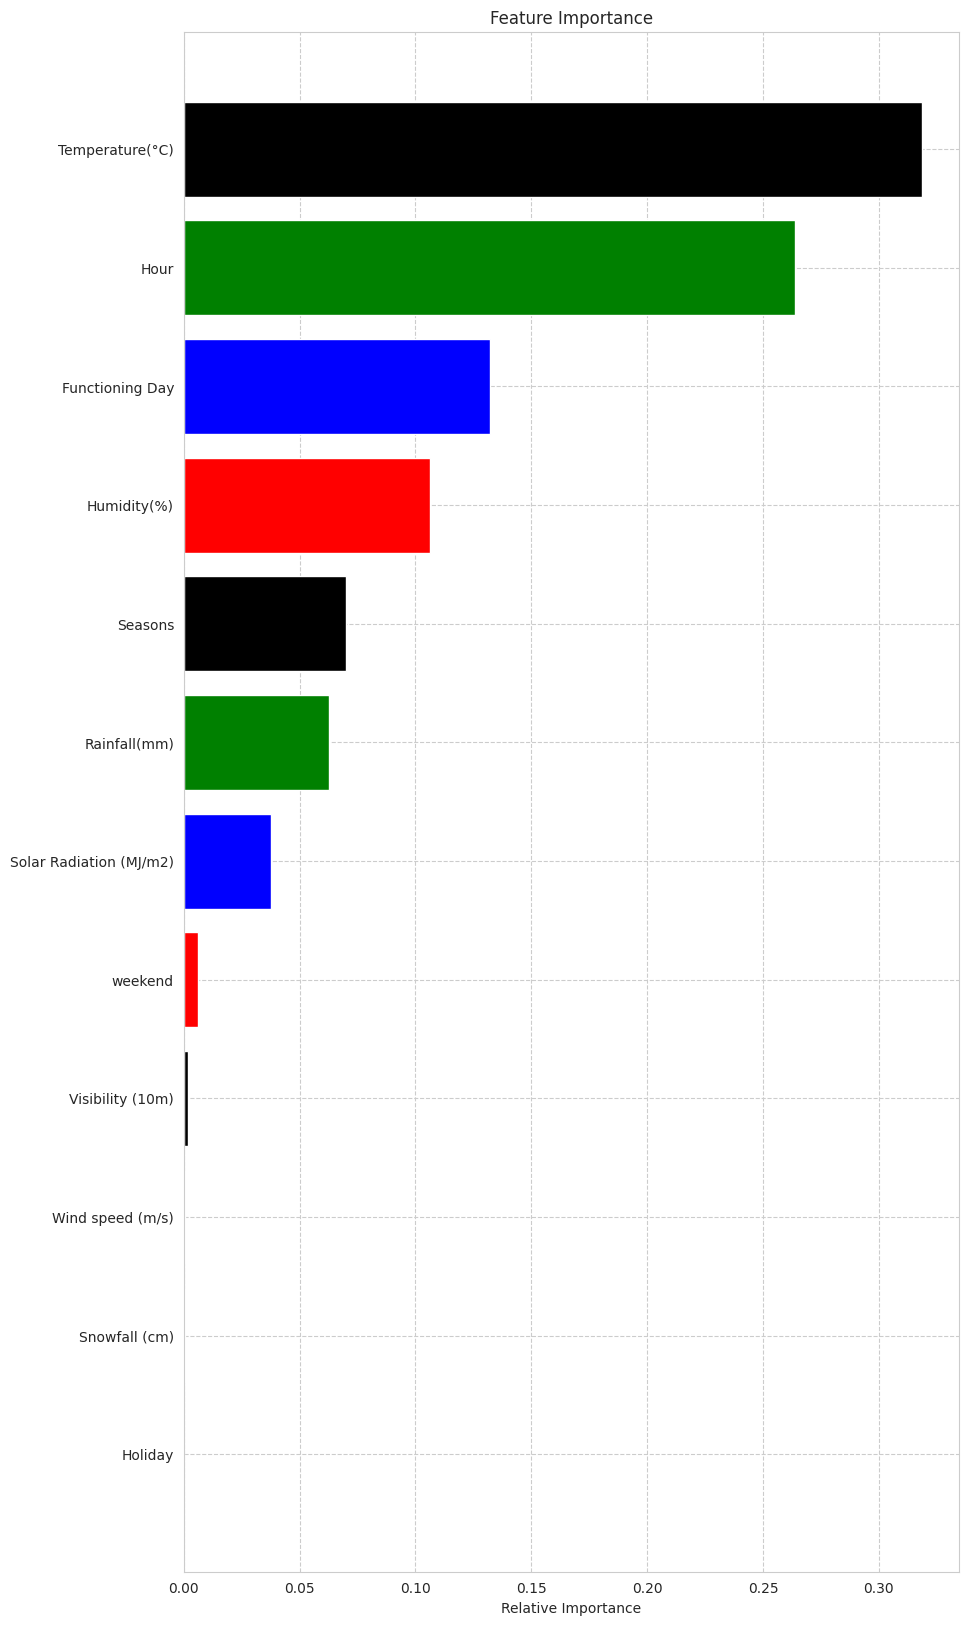

In [ ]:

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
colors = ['red' , 'blue' , 'green' , 'black']
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* Temprature and Hour have the major importance out of all the Features and they have lot of influence on shuffling Rented Bike Counts

## Gradient Boosting Regressor and Hyperparameter Tunning

In [ ]:
#importing packages
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyperparameter Grid
gb_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [5, 6, 7],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = gb_params ,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# best parameters
gb_grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
#best estimator

gb_optimal_model= gb_grid.best_estimator_

In [ ]:
# Model score
gb_optimal_model.score(X_train,Y_train)

0.9683565480073958

In [ ]:
# Making predictions on train and test data
train_pred_gb= gb_optimal_model.predict(X_train)
test_pred_gb= gb_optimal_model.predict(X_test)

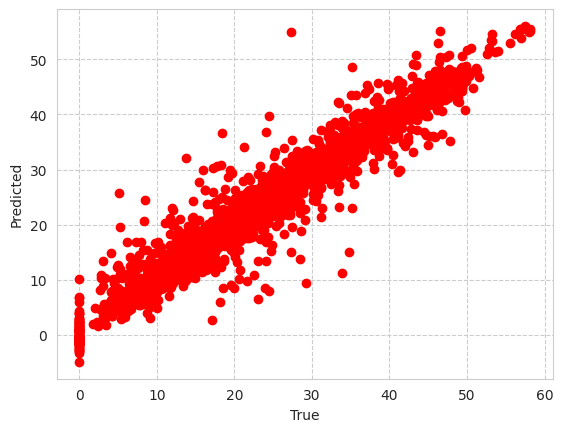

In [ ]:
#scatter plot

plt.scatter(Y_test ,test_pred_gb  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train,train_pred_gb, 'Gradient Boosting', train=True)

MSE : 4.92
RMSE : 2.22
MAE : 1.49
R2 : 0.97
Adjusted R2 : 0.97


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test,test_pred_gb, 'Gradient Boosting', train=False)

MSE : 10.23
RMSE : 3.2
MAE : 2.1
R2 : 0.93
Adjusted R2 : 0.93


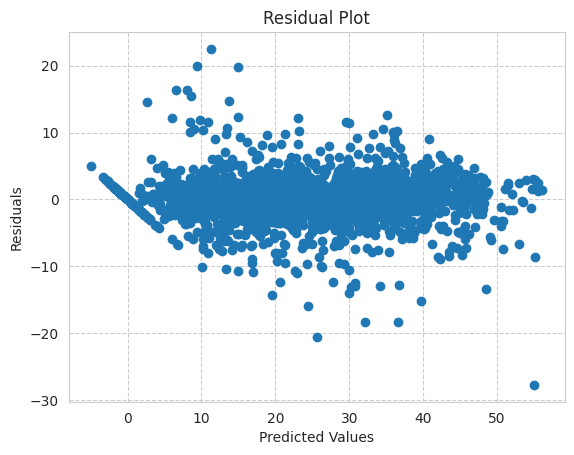

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_pred_gb),(Y_test)-(test_pred_gb))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Feature Importance

In [ ]:
#important features

importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance1_df = pd.DataFrame(importance_dict)

In [ ]:
importance1_df['Feature Importance'] = round(importance1_df['Feature Importance'],2)

In [ ]:

importance1_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.28
0                      Hour                0.25
10          Functioning Day                0.15
2               Humidity(%)                0.12
6              Rainfall(mm)                0.06
8                   Seasons                0.06
5   Solar Radiation (MJ/m2)                0.04
11                  weekend                0.02
4          Visibility (10m)                0.01
3          Wind speed (m/s)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:
#Fitting
gb_optimal_model.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=200)

In [ ]:
#sorting features
features = X_train.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances)

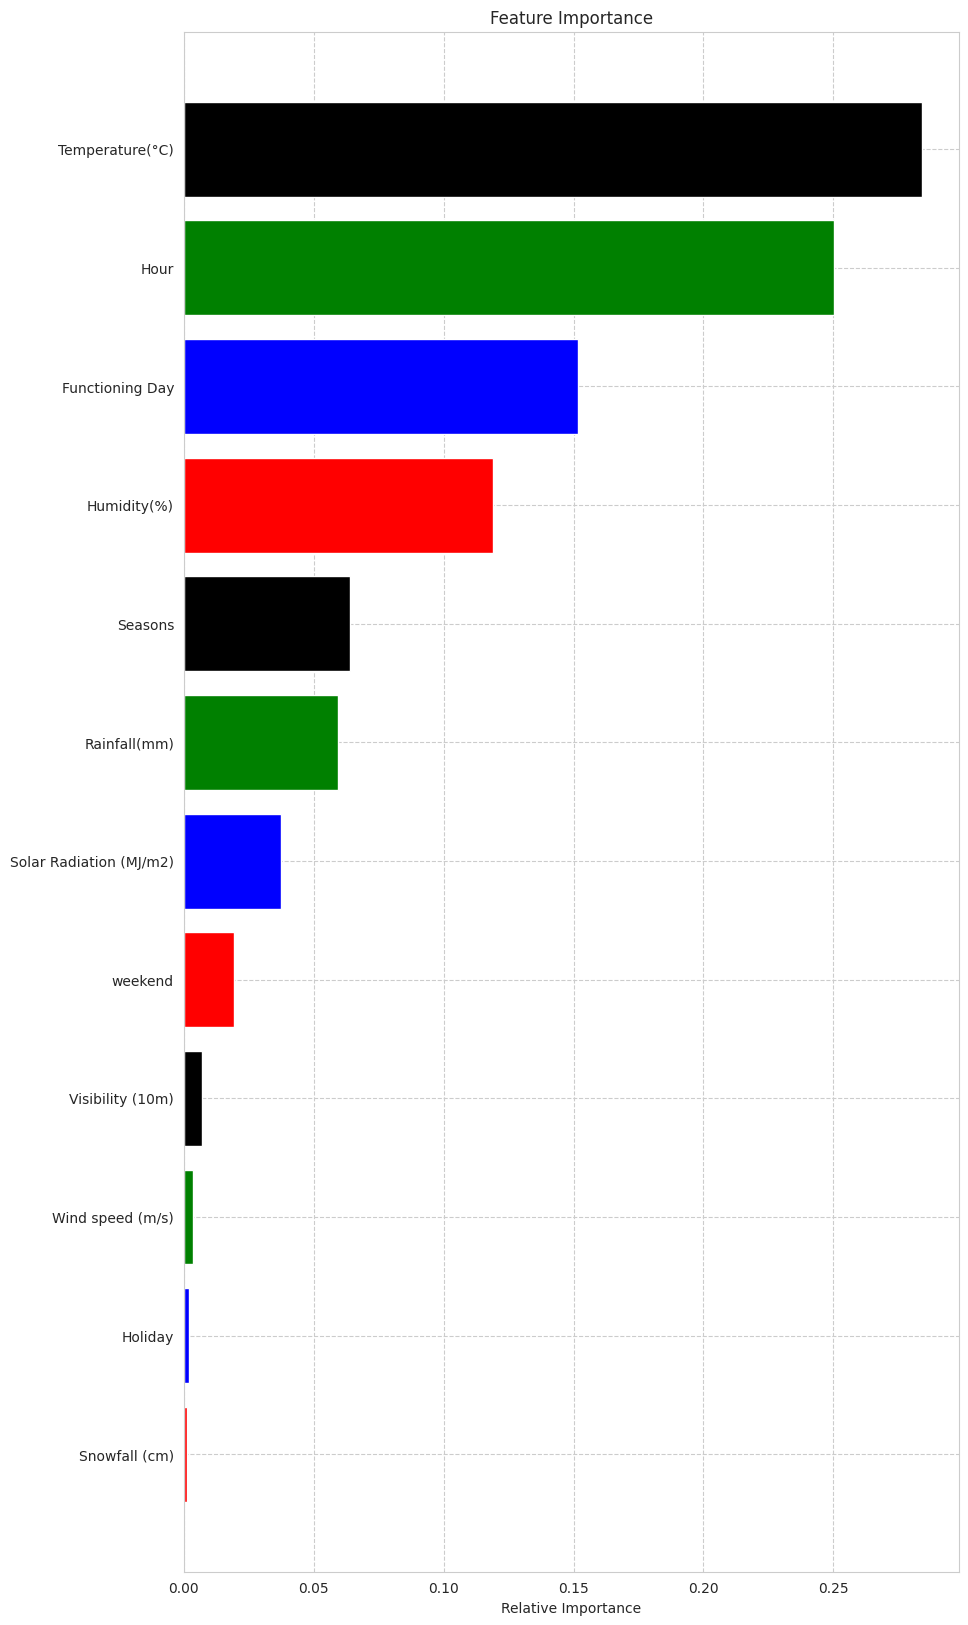

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
colors = ['red' , 'blue' , 'green' , 'black']
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Results

In [ ]:
#training results of evaluation metrics
results_train_df= pd.DataFrame(train_result).T.reset_index()
results_train_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
results_train_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0             Linear  53.81  7.34  5.64      0.65         0.65
1              Lasso  53.81  7.34  5.64      0.65         0.65
2              Ridge  53.81  7.34  5.64      0.65         0.65
3      Random Forest  22.10  4.70  3.39      0.86         0.86
4  Gradient Boosting   4.92  2.22  1.49      0.97         0.97

In [ ]:
#testing results of evaluation metrics
test_results_df= pd.DataFrame(test_result).T.reset_index()
test_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
test_results_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0             Linear  53.74  7.33  5.66      0.65         0.65
1              Lasso  53.74  7.33  5.66      0.65         0.65
2              Ridge  53.74  7.33  5.66      0.65         0.65
3      Random Forest  24.84  4.98  3.59      0.84         0.84
4  Gradient Boosting  10.23  3.20  2.10      0.93         0.93

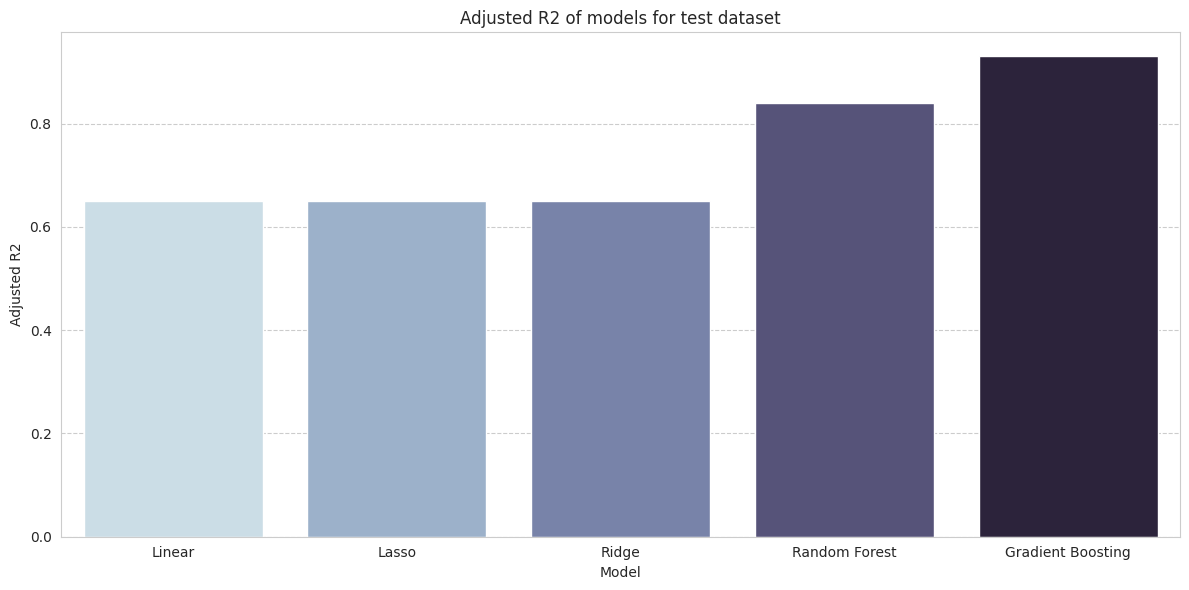

In [ ]:
# plot Adjusted R2 of models for test dataset
plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='Adjusted R2', data=test_results_df, palette="ch:s=.25,rot=-.25")
plt.title("Adjusted R2 of models for test dataset")

plt.tight_layout();

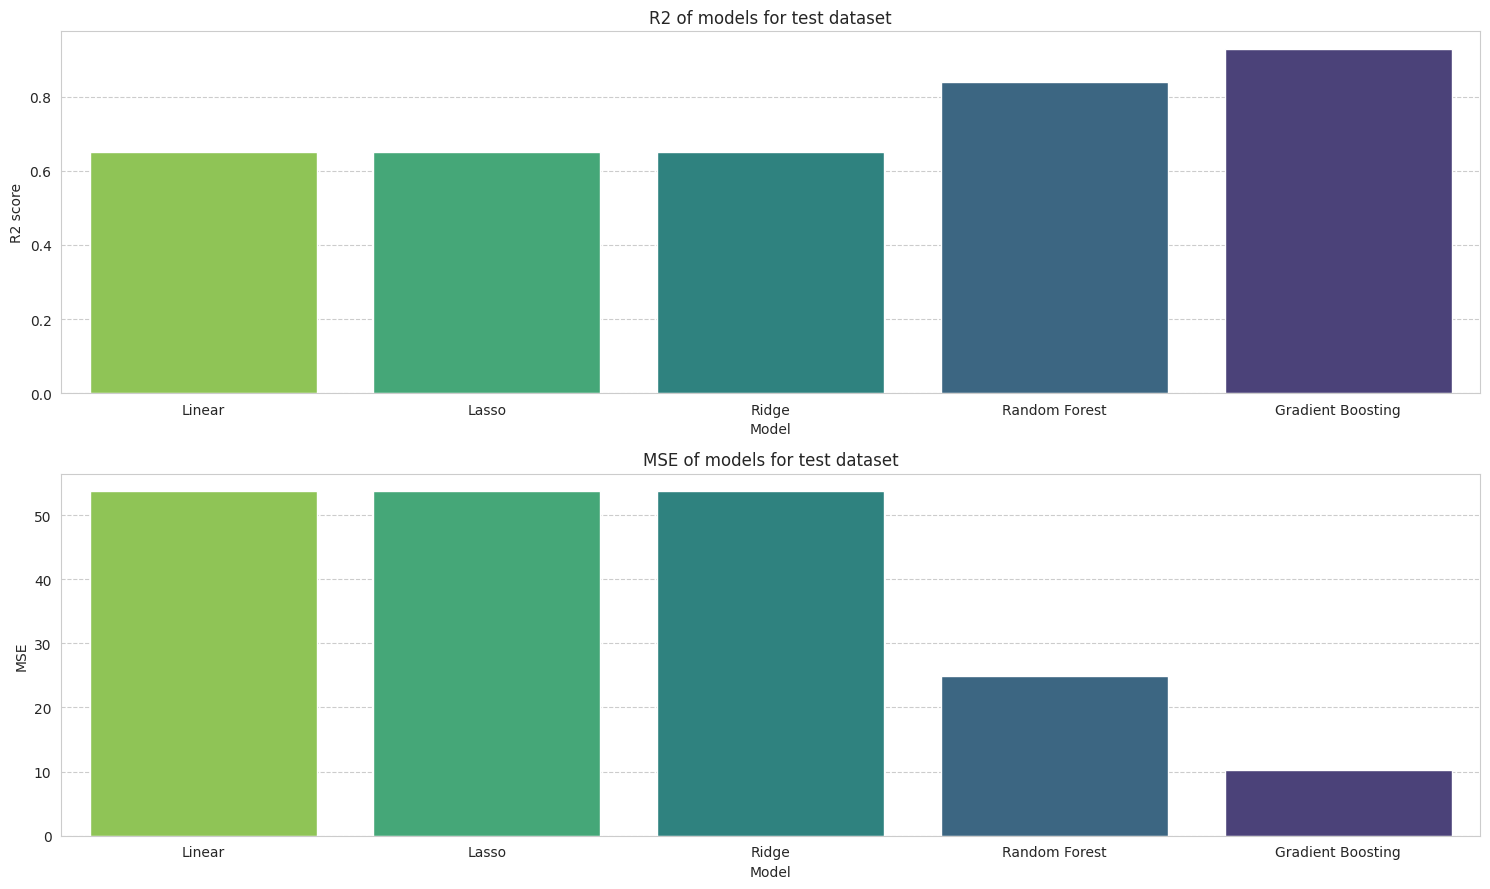

In [ ]:
# plot R2 and MSE of models for test dataset
fig, ax = plt.subplots(2,figsize=(15,9))
sns.barplot(x='Model',y='R2 score', data=test_results_df, palette="viridis_r", ax= ax[0])
ax[0].set_title("R2 of models for test dataset")

sns.barplot(x='Model',y='MSE', data=test_results_df, palette="viridis_r", ax= ax[1])
ax[1].set_title("MSE of models for test dataset")

plt.tight_layout()
plt.show()

# Conclusion

During the analysis phase, I commenced by cleaning the data and conducting an extensive Exploratory Data Analysis (EDA) on all dataset features. Initially, I scrutinized the dependent variable 'Rented Bike Count' and implemented necessary transformations. Following this, I delved into the examination of both numerical and categorical independent variables. Utilizing Monovariate and Bivariate analyses, I thoroughly studied these variables. Additionally, I investigated numerical variables, assessed their correlations, and explored their associations with the dependent variable. Addressing multicollinearity, I employed VIF methods. Moreover, I facilitated Label Encoding for numerical variables, augmenting the dataset with an additional column.

Employing five distinct machine learning algorithms such as Linear Regression, Lasso, Ridge, Random Forest, and Gradient Boosting, I conducted a comprehensive model evaluation. Subsequently, I conducted hyperparameter tuning to optimize the models' performance.

Key insights gleaned from the analysis are as follows:

The Gradient Boosting Regressor model exhibited promising results, showcasing the highest values for R-squared and Adjusted R-squared, alongside the lowest values for MSE and RMSE, making it a potential solution for this problem.
Bike rental demand significantly peaks during the summer season, with the lowest rentals observed during winter.
Clear weather conditions correlate with increased bike demand compared to snowy or rainy days.
Temperatures ranging between 22°C to 25°C manifest a higher demand for bike rentals.




